<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Модели-градиентного-бустинга" data-toc-modified-id="Модели-градиентного-бустинга-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модели градиентного бустинга</a></span><ul class="toc-item"><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Подготовка-категориальных-признаков-для-других-моделей" data-toc-modified-id="Подготовка-категориальных-признаков-для-других-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подготовка категориальных признаков для других моделей</a></span><ul class="toc-item"><li><span><a href="#OHE-и-стандартизация-признаков" data-toc-modified-id="OHE-и-стандартизация-признаков-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>OHE и стандартизация признаков</a></span></li><li><span><a href="#OriginalEncoder-и-стандартизация-для-моделей-GradientBoostingRegressor-и-RandomForest" data-toc-modified-id="OriginalEncoder-и-стандартизация-для-моделей-GradientBoostingRegressor-и-RandomForest-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>OriginalEncoder и стандартизация для моделей GradientBoostingRegressor и RandomForest</a></span></li></ul></li><li><span><a href="#GradientBoostingRegressor" data-toc-modified-id="GradientBoostingRegressor-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>GradientBoostingRegressor</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Лассо" data-toc-modified-id="Лассо-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Лассо</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение моделей</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
import catboost as cat
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, cross_validate
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import statistics as st
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OrdinalEncoder 

In [2]:
data_car = pd.read_csv('autos.csv')

In [3]:
data_car.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Описание данных  
 
Признаки  
DateCrawled — дата скачивания анкеты из базы  
VehicleType — тип автомобильного кузова  
RegistrationYear — год регистрации автомобиля  
Gearbox — тип коробки передач  
Power — мощность (л. с.)  
Model — модель автомобиля  
Kilometer — пробег (км)  
RegistrationMonth — месяц регистрации автомобиля  
FuelType — тип топлива  
Brand — марка автомобиля  
NotRepaired — была машина в ремонте или нет  
DateCreated — дата создания анкеты  
NumberOfPictures — количество фотографий автомобиля  
PostalCode — почтовый индекс владельца анкеты (пользователя)  
LastSeen — дата последней активности пользователя  
Целевой признак  
Price — цена (евро)  

In [5]:
def info_df(df):
    print('Размер датасета -', df.shape)
    print()
    print('Количество дубликатов -', df.duplicated().sum())
    print()
    print('Количество пропущенных значений:', df.isna().sum(), sep='\n')

In [6]:
info_df(data_car)

Размер датасета - (354369, 16)

Количество дубликатов - 4

Количество пропущенных значений:
DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64


Столбцы ниже - это информация сайта, которые никак не влияют на цену автомобиля:  
- DateCrawled — дата скачивания анкеты из базы  
- DateCreated — дата создания анкеты  
- NumberOfPictures — количество фотографий автомобиля   
- LastSeen — дата последней активности пользователя   

PostalCode — почтовый индекс владельца анкеты (пользователя) - в зависимости от региона цена на автомобиль может менятся, далее проверим корреляцию по этому столбцу.  


In [7]:
print('Количество уникальных почтовых индексов', data_car['PostalCode'].nunique())

Количество уникальных почтовых индексов 8143


In [8]:
data_car.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DateCrawled,354369,271174,2016-03-24 14:49:47,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,354369.0,NaN,NaN,NaN,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
VehicleType,316879,8,sedan,91457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RegistrationYear,354369.0,NaN,NaN,NaN,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Gearbox,334536,2,manual,268251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,354369.0,NaN,NaN,NaN,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Model,334664,250,golf,29232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometer,354369.0,NaN,NaN,NaN,128211.172535,37905.34153,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,NaN,NaN,NaN,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
FuelType,321474,7,petrol,216352,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В датасете есть некорректрые значения:  
- слишком высокая и слишком низкая мощность - 20000 л.с. и 0 л.с.     
- месяц регистрации 0. 
- год регистрации больше 2022, например, 9999, минимальный год - 1000.  
- минимальная цена - 0, возможно, конечно, что автомобиль хотят отдать бесплатно, но для построения модели предсказания цены - это не корректно. 
- NumberOfPictures: все значения это - 0 - столбец не нужен, так как не содержит информации.

In [9]:
# функция для подсчета пропусков по всему датасету - df - по умолчанию 
# столбец с количеством пропусков name_1 - значение по умолчанию 'null_value'
# на выходе столбец 'percent_null' - % пропущенных значений

def null_sum(df=data_car, name_1='nan_count'):
    isna_columns = df.isna().sum().to_frame(name=name_1)
    isna_columns['percent_nan_of_total'] = round((isna_columns[name_1] / len(df) * 100), 1)
    return isna_columns.query('percent_nan_of_total > 0')

Количество пропусков в столбцах

In [10]:
null_sum(df=data_car, name_1='nan_count')

,nan_count,percent_nan_of_total
VehicleType,37490,10.6
Gearbox,19833,5.6
Model,19705,5.6
FuelType,32895,9.3
NotRepaired,71154,20.1


Самое большое количество пропусков в столбце ремонта - 20% пропусков.  
Почти одинаковое количество пропусков в столбцах Gearbox, Model. Проверим в одних и тех же строках. 

In [11]:
data_car[data_car['Gearbox'].isna() &
        data_car['Model'].isna()].shape

(4131, 16)

Пропуски и в модели авто и в коробке передач имеются только в 4131 случае из 19833.

In [12]:
# тепловая карта корреляции

def heatmap_b(df, title_1='Корреляция признаков'):
    plt.figure(figsize=(15, 3))

    matrix = np.triu(df.corr())
    
    heatmap_b = sns.heatmap((df.corr()), 
        vmin=-1, 
        vmax=1, 
        cmap="YlGnBu", 
        annot=True, 
        fmt='.2g', mask=matrix, annot_kws={'fontsize':16})


    heatmap_b.set_title(title_1, fontdict={'fontsize':16})

    return heatmap_b

In [13]:
column_int = [i for i in data_car if data_car[i].dtype == 'int64']
column_int
column_object = [i for i in data_car if data_car[i].dtype == 'object']
column_object

['DateCrawled',
 'VehicleType',
 'Gearbox',
 'Model',
 'FuelType',
 'Brand',
 'NotRepaired',
 'DateCreated',
 'LastSeen']

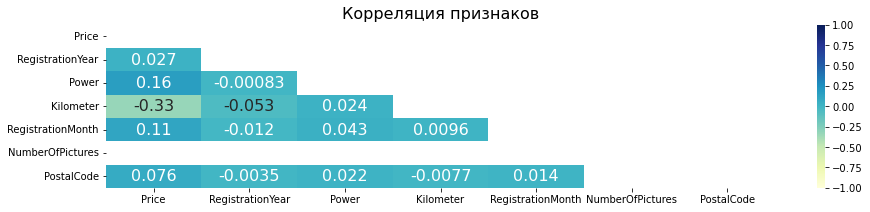

In [14]:
heatmap_b(data_car[column_int])
plt.show()

Судя по коэффициенту корреляции, больше всего цена зависит от пробега автомобиля, чем выше пробег, тем ниже цена, коээфициент корреляции равен - (-0.33), чуть ниже коэффиент корреляции у мощности авто с ценой - 0.16, то есть, чем больше мощность, тем выше цена. Остальные зависимости малы, около 0.

Выведем на экран уникальные значения в столбцах.

In [15]:
for i in data_car.columns:
    print('Уникальные значения столбца', i) 
    print(data_car[i].value_counts(dropna=False)) 
    print()

Уникальные значения столбца DateCrawled
2016-03-24 14:49:47    7
2016-03-26 22:57:31    6
2016-03-19 21:49:56    6
2016-04-02 14:50:21    5
2016-03-23 13:50:19    5
                      ..
2016-03-20 16:48:06    1
2016-03-22 21:51:04    1
2016-03-11 16:25:36    1
2016-03-31 12:47:30    1
2016-03-19 18:57:12    1
Name: DateCrawled, Length: 271174, dtype: int64

Уникальные значения столбца Price
0        10772
500       5670
1500      5394
1000      4649
1200      4594
         ...  
1368         1
233          1
11080        1
16340        1
10985        1
Name: Price, Length: 3731, dtype: int64

Уникальные значения столбца VehicleType
sedan          91457
small          79831
wagon          65166
NaN            37490
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

Уникальные значения столбца RegistrationYear
2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
        ...  
6500 

Столбцы с датами для обучения не понадобятся. Единсвенное, можно оставить год  регистрации анкеты из столбца DateCreated, так цена была сформирована на момент регистрации анкеты, и на тот момент, возможно автомобиль имел меньший износ при сравнении с сегодняшним днем.    

In [16]:
data_car[data_car['Power'] > 1000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 1816 to 354260
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DateCrawled        302 non-null    object
 1   Price              302 non-null    int64 
 2   VehicleType        258 non-null    object
 3   RegistrationYear   302 non-null    int64 
 4   Gearbox            285 non-null    object
 5   Power              302 non-null    int64 
 6   Model              265 non-null    object
 7   Kilometer          302 non-null    int64 
 8   RegistrationMonth  302 non-null    int64 
 9   FuelType           245 non-null    object
 10  Brand              302 non-null    object
 11  NotRepaired        196 non-null    object
 12  DateCreated        302 non-null    object
 13  NumberOfPictures   302 non-null    int64 
 14  PostalCode         302 non-null    int64 
 15  LastSeen           302 non-null    object
dtypes: int64(7), object(9)
memory usage: 4

Имеется 88 строк, в которых указана мощность выше 4000 л.с. - мощность выше 4000 на сегодняшний день отсутствует. В целом, 500 л.с. это уже высокая мощность для автомобиля. в 459 объявлениях мощность более 500 л.с.  

Выведем на экран количество объявлений авто, в которых год регистрации выше 2022 и ниже 1970.

In [17]:
min_date = data_car[
    data_car['RegistrationYear'
            ] < 1970]['RegistrationYear'].value_counts().reset_index().sort_values(by='index')
print('Всего объявлений автомобилей с годом регистрации до 1970 года - ', min_date['RegistrationYear'].sum())
min_date.head()

Всего объявлений автомобилей с годом регистрации до 1970 года -  1338


,index,RegistrationYear
11,1000,37
59,1001,1
47,1039,1
38,1111,3
53,1200,1


In [18]:
def barplot_sns(data0, x0, y0, title0='Количество объявлений по годам до 1970 года', 
                xlabel0='Год регистрации', ylabel0='Количество объявлений', rotation_x=90):    
    
    plt.figure(figsize=(20, 5))
    bar = sns.barplot(data=data0, x=x0, y=y0, palette='mako')
    bar.set_title(title0, fontdict={'fontsize': 14})
    bar.set_xlabel(xlabel0, fontsize=14)
    bar.set_ylabel(ylabel0, fontsize=14)
    plt.grid(color = 'lightblue', linewidth = 1, linestyle=':')
    plt.xticks(rotation=rotation_x)
    return bar

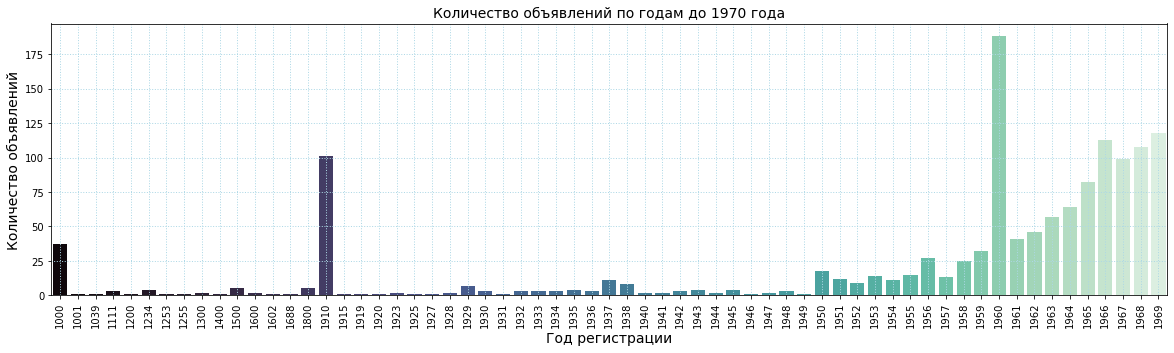

In [19]:
barplot_sns(data0=min_date, x0='index', y0='RegistrationYear')
plt.show()

Год выпуска до 1900 точно ошибка, их можно удалять, нет смысла обучать модель на таких данных.  
В целом, автомобилей года выпуска до 1970 мало, и скорее это единичные и уникальные автомобили.   
Автомобиль, например 1950 года может быть уникальным раритетом, и цену, вероятно, сможет назвать только эксперт в этой области. Плюс, в зависимости от состояния авто такого года, это может быть как авто в очень плохом состоянии, так и коллекционный автомобиль в отличном состоянии. Построим ящик с усами, оценим с какого года начинаются выбросы.  

Так же есть значения выше 2020 года - вероятно, что это ошибка.  
Проверим сколько таких значений

In [20]:
max_date = data_car[
    data_car['RegistrationYear'
            ] > 2022]['RegistrationYear'].value_counts().reset_index().sort_values(by='index')
print('Всего объявлений автомобилей с годом регистрации выше 2022 года - ', max_date['RegistrationYear'].sum())
max_date.head()

Всего объявлений автомобилей с годом регистрации выше 2022 года -  105


,index,RegistrationYear
32,2066,1
34,2200,1
12,2222,2
24,2290,1
5,2500,4


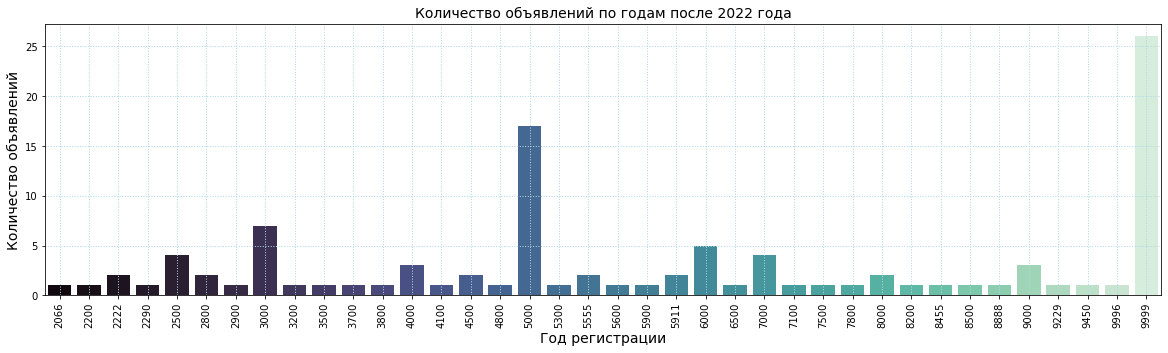

In [21]:
barplot_sns(data0=max_date, x0='index', y0='RegistrationYear', title0='Количество объявлений по годам после 2022 года')
plt.show()

Год регистрации автомобиля - важный показатель его стоимости - так как авто, выпущенное, например, в 2022 году будет стоить дороже на сегодняшний день, чем та же модель, выпущенная в 2010.  

Оценим сколько объетов с 0 месяцом регистрации

In [22]:
data_car[data_car['RegistrationMonth'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37352 entries, 0 to 354337
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DateCrawled        37352 non-null  object
 1   Price              37352 non-null  int64 
 2   VehicleType        22436 non-null  object
 3   RegistrationYear   37352 non-null  int64 
 4   Gearbox            27583 non-null  object
 5   Power              37352 non-null  int64 
 6   Model              30810 non-null  object
 7   Kilometer          37352 non-null  int64 
 8   RegistrationMonth  37352 non-null  int64 
 9   FuelType           23715 non-null  object
 10  Brand              37352 non-null  object
 11  NotRepaired        15256 non-null  object
 12  DateCreated        37352 non-null  object
 13  NumberOfPictures   37352 non-null  int64 
 14  PostalCode         37352 non-null  int64 
 15  LastSeen           37352 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.

37352 строки - это около 10% всего датасета, возможно заполнить месяц рандомно.

In [23]:
column_int

['Price',
 'RegistrationYear',
 'Power',
 'Kilometer',
 'RegistrationMonth',
 'NumberOfPictures',
 'PostalCode']

Построим ящики с усами и оценим масштаб выбросов в данных.

In [24]:
def boxplot_5(df, suptitle_='Data', s=1, f=2, figsize_=(20, 3)):  
    
    # функция по построению  boxplot по 2 на строке
    # на вход: датасет, имя Графиков, f- количество на строке, figsize_ - размер
    
    fig, axs = plt.subplots(s, f, figsize=figsize_)
    
    fig.suptitle(suptitle_, fontsize=16)
       
    for i in range(f):
        box_col = sns.boxplot(x=df.iloc[:, i],  ax=axs[i], color='mediumblue', linewidth=2.5)
        box_col = sns.stripplot(x=df.iloc[:, i], ax=axs[i], marker="o", alpha=0.05, color="skyblue")
        
        box_col.set_title(df.columns[i], fontsize=16)
        box_col.set_xlabel('')
        box_col.grid(color = 'lightblue', linewidth = 1, linestyle=':')

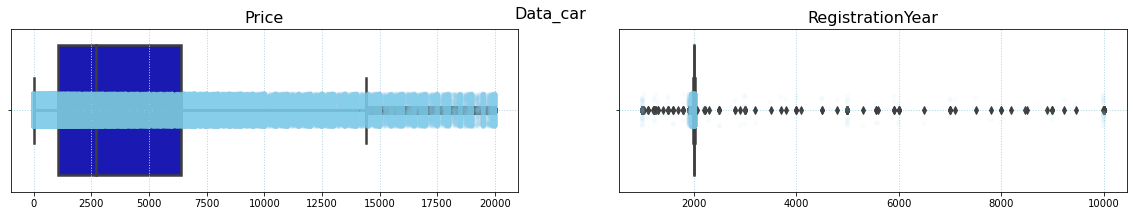

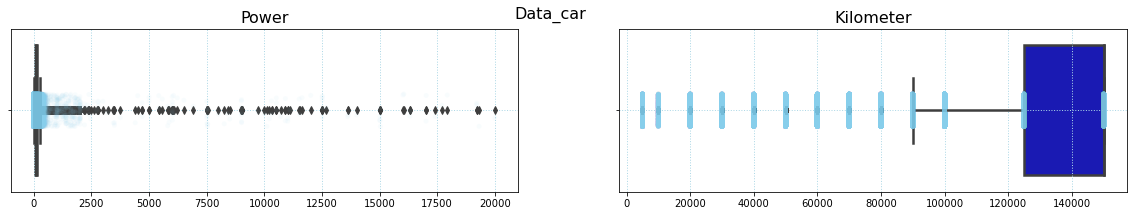

In [25]:
boxplot_5(df=data_car[['Price','RegistrationYear']], 
          suptitle_='Data_car', s=1, f=2, figsize_=(20, 3))
boxplot_5(df=data_car[['Power','Kilometer']], 
          suptitle_='Data_car', s=1, f=2, figsize_=(20, 3))

In [26]:
def prcnt(df):
    # функция для расчета верхней и нижней границ выбросов значений
    
    q75,q25 = np.percentile(df,[75,25]) # 75 и 25 процентили
    intr_qr = q75-q25 # межквартильный размах

    max_1 = q75+(1.5*intr_qr) # 75 квантиль + 1.5 межквартильного размаха
    min_2 = q25-(1.5*intr_qr) # 25 квантиль - 1.5 межквартильного размаха

    if min_2 < df.min(): # проверка на минимальное значение в случае, если минимум выше, чем нижняя граница выброса
        min_2 = df.min()

    print('Верхняя граница выбросов', max_1) 
    print('Нижняя граница выбросов', min_2)   
    return max_1, min_2

In [27]:
print('Столбец мощность - Power')
power_max, power_min = prcnt(data_car['Power']) 
print()
print('Столбец цена - Price')
price_max, price_min = prcnt(data_car['Price']) 
print()
print('Столбец год регитсрации - RegistrationYear')
price_max, price_min = prcnt(data_car['RegistrationYear']) 

Столбец мощность - Power
Верхняя граница выбросов 254.0
Нижняя граница выбросов 0

Столбец цена - Price
Верхняя граница выбросов 14425.0
Нижняя граница выбросов 0

Столбец год регитсрации - RegistrationYear
Верхняя граница выбросов 2021.5
Нижняя граница выбросов 1985.5


Цена - 0, конечно может быть, если человеку нужно автомобиль, например, отдать для вывоза или утилизации, но так как задача стоит по предсказанию цены, то цена 0 нас мало интересует.  

Год регистрации - RegistrationYear -  выбросы это все, что выше 2022 года, и ниже 1985 года.  

Мощность автомобиля - Power - 254 л.с. Есть автомобили, которые имеют мощность выше, чем 254, хотя, выше 500 л.с. это уже редкие авто, например, спортивные, но все же, такие есть. Но мощность выше 800-900 л.с. это, вероятно, ошибка. Так же, мощность автомобиля 0   это не верно, возможно пользователь не указал мощность продаваемого авто.  
Пробег - Kilometer - может быть разный - от совсем нового автомобиля с пробегом около 0 до очень высокого пробега - например, если продается бывшее такси. Поэтому в этом столбце выбросы можно оставить.

In [28]:
data_car[data_car['Price'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10772.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
RegistrationYear,10772.0,2008.848403,267.729824,1000.0,1996.00,2000.0,2005.00,9999.0
Power,10772.0,81.200056,235.273205,0.0,0.00,75.0,120.00,15016.0
Kilometer,10772.0,124177.961381,48423.379468,5000.0,125000.00,150000.0,150000.00,150000.0
RegistrationMonth,10772.0,3.697271,4.046864,0.0,0.00,2.0,7.00,12.0
NumberOfPictures,10772.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
PostalCode,10772.0,44937.204790,26395.784541,1069.0,25336.75,42855.0,63668.75,99996.0


In [29]:
data_car.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DateCrawled,354369,271174,2016-03-24 14:49:47,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,354369.0,NaN,NaN,NaN,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
VehicleType,316879,8,sedan,91457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RegistrationYear,354369.0,NaN,NaN,NaN,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Gearbox,334536,2,manual,268251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,354369.0,NaN,NaN,NaN,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Model,334664,250,golf,29232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometer,354369.0,NaN,NaN,NaN,128211.172535,37905.34153,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,NaN,NaN,NaN,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
FuelType,321474,7,petrol,216352,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Вывод**  
***
- исходный датасет содержит 354369 строк, 16 столбцов.  


- данные содержатся в типах int и object.  


- присутсвуют количественные и категориальные признаки, целевой признак - цена - количественный типа int. Для обучения некоторых моделей категориальные признаки необходимо закодировать и преобразовать их в количественные.  


- для удобства дальнейшей работы наименования столбцов необходимо привести к змеиному регистру.  


- в датасете присутсвует 4 явных дубликата. 


- пропущенные значения имеются в столбцах VehicleType (10.6%), Gearbox(5.6%), Model(5.6%), FuelType(9.3%), 
NotRepaired(20.1%).  


- в столбцах DateCrawled, DateCreated, Numberoftures, LastSeen содержится информация об активности на сайте, поэтому, в том виде, в котором эти данные есть для обучения модели не нужны.   
Стоит заметить, что год объявления может повлиять на цену - так, при одинаковом состоянии, автомобиль выпуска 2010 года в 2012 году ртоит дороже, чем в 2020. Поэтому, из одного из столбцов необходимо оставить год продажи и далее проверить зависимость нового признака.  



- имеется 37352 строки - это около 10% всего датасета с месяцем 0, заполним месяц рандомно.


- необходимо удалить столбцец NumberOfPictures, так как в нем нет данных - одни 0.


- имеются некорректные значения в столбцах

    - цена(Price) - 0 - таких объектов - 10772 - будет странно, если модель предложит продавцу продавть авто за 0.

    - минимальный год регистрации автомомбиля - 1000, максимальный 9999. Имеются данные, в которых года регистрации до 1985, и после 2022.

    - мощность в 0 л.с. - вероятно, что пользователь не указал мощность автомобиля. Так же, присуствуют авто с мощностью выше 500 л.с.

    - месяц регистрации 0 - такого месяца нет - возможно пользователь не указал точный месяц или данные собраны из нескольких источников - в одном месяцы с 0 по 11, в другом с 1 по 12. Всего объектов 37352 - это около 10% от всего датасета.


- имеются выбросы в данных, которые следует удалить - в них как раз попадают нереальные значения, указанные выше.  



- обратную зависимость имеет цена от пробега автомобиля (коэффициент корреляции -0.33), и прямую зависимость цены от мощности (0.16). Для остальных количественных признаков коэффициент корреляции около 0.  



Далее необходимо выполнить предобработку данных по вышеуказанным позициям.

### Предобработка данных

**Переименование столбцов**

В первую очередь приведем датасет к удобному формату.  
Переименуем колонки

In [30]:
data_car_before = data_car.shape

In [31]:
data_car.columns = ['Date_Crawled', 'Price', 'Vehicle_Type', 'Registration_Year', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'Registration_Month', 'Fuel_Type', 'Brand',
       'Not_Repaired', 'Date_Created', 'Number_Of_Pictures', 'Postal_Code',
       'Last_Seen']

data_car.columns = data_car.columns.str.lower()

In [32]:
data_car.head(1)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57


Переведем даты в формат даты-времени

In [33]:
data_car['date_crawled'] = pd.to_datetime(data_car['date_crawled'], format='%Y-%m-%d')
data_car['date_created'] = pd.to_datetime(data_car['date_created'], format='%Y-%m-%d')
data_car['last_seen'] = pd.to_datetime(data_car['last_seen'], format='%Y-%m-%d')

In [34]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   kilometer           354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  not_repaired        283215 non-null  object        
 12  date_created        354369 non-null  datetime64[ns]
 13  number_of_pictures  354369 no

Цена могла менятся на протяжении времени продажи объявления, поэтому добавим год 

In [35]:
data_car['year_created'] = data_car['date_created'].dt.year

In [36]:
data_car['year_created'].unique()

array([2016, 2015, 2014], dtype=int64)

Удалим столбец с количеством фотографий number_of_pictures, так как информации в нем нет.  
Так же, удалим столбцы date_crawled, date_created, last_seen.

In [37]:
data_car = data_car.drop(['date_crawled', 'date_created', 'last_seen', 'number_of_pictures'], axis=1)

In [38]:
print('Количество дубликатов после удаления столбцов - ', data_car.duplicated().sum())

Количество дубликатов после удаления столбцов -  21332


Появилось много дубликатов - разница была только в датах регистрации - это, могли быть, одинаковые анкеты, зарегистрированные, например, под разными пользователями.   
Удалим дубликаты.

In [39]:
data_car = data_car.drop_duplicates()

In [40]:
print('Количество дубликатов после удаления - ', data_car.duplicated().sum())

Количество дубликатов после удаления -  0


In [41]:
data_car.describe().T

,count,mean,std,min,25%,50%,75%,max
price,333037.0,4378.282452,4502.528939,0.0,1000.0,2699.0,6299.0,20000.0
registration_year,333037.0,2004.192246,90.288626,1000.0,1999.0,2003.0,2008.0,9999.0
power,333037.0,109.753487,194.287946,0.0,68.0,103.0,140.0,20000.0
kilometer,333037.0,128305.743806,37899.969307,5000.0,125000.0,150000.0,150000.0,150000.0
registration_month,333037.0,5.694151,3.728756,0.0,3.0,6.0,9.0,12.0
postal_code,333037.0,50689.674457,25804.445066,1067.0,30179.0,49479.0,71334.0,99998.0
year_created,333037.0,2015.999931,0.008664,2014.0,2016.0,2016.0,2016.0,2016.0


Теперь заполним рандомно месяц регистрации равный 0.

In [42]:
data_car.loc[data_car['registration_month'] == 0, 
             'registration_month'] = data_car['registration_month'].apply(lambda x: np.random.randint(1, 12))

In [43]:
print('Минимальный месяц - ', data_car['registration_month'].min())
print('Максимальный месяц - ', data_car['registration_month'].max())

Минимальный месяц -  1
Максимальный месяц -  12


Рассмотрим границы выбросов по столбцам с ценой, мощностью и годо регитсрации.

In [44]:
print('Столбец мощность - Power')
power_max, power_min = prcnt(data_car['power']) 
print()
print('Столбец цена - Price')
price_max, price_min = prcnt(data_car['price']) 
print()
print('Столбец год регистрации - RegistrationYear')
price_max, price_min = prcnt(data_car['registration_year'])

Столбец мощность - Power
Верхняя граница выбросов 248.0
Нижняя граница выбросов 0

Столбец цена - Price
Верхняя граница выбросов 14247.5
Нижняя граница выбросов 0

Столбец год регистрации - RegistrationYear
Верхняя граница выбросов 2021.5
Нижняя граница выбросов 1985.5


**Год регистрации**

RegistrationYear - выбросы начинаются с 2022 года, но дата скачивания анкет - 2016 год. Вероятно, что это ошибки в данных. Поэтому оставим границы значений с 1985 до 2016 года.

In [45]:
data_car_clean = (data_car[(data_car['registration_year'] <= 2016) & (data_car['registration_year'] >= 1985)]).copy()
data_car_clean.shape

(313851, 13)

**Цена**

In [46]:
print('Количество объектов с ценой 0 - ', data_car_clean[data_car_clean['price'] == 0].shape[0])

Количество объектов с ценой 0 -  8854


Модель не должна показывать цену 0 для пользователя, поэтому в целях обучения удалим объекты с ценой равной 0.  
Верхняя цена все таки может быть разной, поэтому верхниче выбросы в цене оставим как есть.

In [47]:
data_car_clean = data_car_clean.loc[(data_car_clean['price'] > 0)]

In [48]:
print('Размер датасета после изменений', data_car_clean.shape)

Размер датасета после изменений (304997, 13)


**Мощность**  
Удалим объекты с мощностью выше 800 л.с.

In [49]:
data_car_clean = data_car_clean.loc[(data_car_clean['power'] < 800) &
                                   (data_car_clean['power'] > 0)]

In [50]:
data_car_clean.shape
print('Удалено объектов - ', data_car_before[0] - data_car_clean.shape[0])
print('Это составило ', round((((data_car_before[0] - data_car_clean.shape[0]) / 354369)*100), 1), '%')

Удалено объектов -  79992
Это составило  22.6 %


In [51]:
print('Количество объектов с мощностью 0', data_car_clean.loc[(data_car_clean['power'] == 0)].shape[0])

Количество объектов с мощностью 0 0


Проверим сколько осталось пропущенных значений после удаления некорректных.

In [52]:
null_sum(df=data_car_clean, name_1='nan_count')

,nan_count,percent_nan_of_total
vehicle_type,10650,3.9
gearbox,5129,1.9
model,10218,3.7
fuel_type,14998,5.5
not_repaired,40564,14.8


Проверим у каких брендов авто есть пропуски в столбце с наименованием модели

In [53]:
data_car_clean[data_car_clean['model'].isna()]['brand'].unique()

array(['audi', 'sonstige_autos', 'fiat', 'volkswagen', 'bmw', 'peugeot',
       'alfa_romeo', 'mitsubishi', 'mercedes_benz', 'renault', 'nissan',
       'skoda', 'ford', 'kia', 'opel', 'hyundai', 'seat', 'chrysler',
       'toyota', 'porsche', 'smart', 'volvo', 'mazda', 'land_rover',
       'suzuki', 'lancia', 'honda', 'mini', 'chevrolet', 'dacia',
       'jaguar', 'citroen', 'rover', 'daihatsu', 'saab', 'trabant',
       'subaru', 'daewoo', 'jeep', 'lada'], dtype=object)

In [54]:
data_car_clean[data_car_clean['model'].isna()]['registration_year'].unique()

array([2011, 1994, 1997, 1992, 2009, 2001, 2008, 1990, 2012, 2004, 2007,
       2005, 2002, 2003, 1995, 2000, 2010, 2016, 1998, 1985, 1996, 2015,
       1999, 1989, 2006, 2013, 1993, 1991, 1988, 1986, 2014, 1987],
      dtype=int64)

Во всех этих брендах авто есть несколько моделей и цена зависит от модели авто. 

Большое количество пропусков в колонке с ремонтом not_repaired - 18.3%, угать была ли в ремонте машина мы не можем, но удалять столько значений было бы некорректно.  

Заменим пропуски в столбце model и not_repaired на unknown - будет еще одна категория.

In [55]:
data_car_clean.loc[data_car_clean['model'].isna(), 'model'] = 'unknown'
data_car_clean.loc[data_car_clean['not_repaired'].isna(), 'not_repaired'] = 'unknown'

Количество пропусков в процентном отношении уменьшилось после удаления выбросов и прочих значений.  
Заполним пропуски.

In [56]:
print('Количество моделей авто, у которых не указан тип кузова - ', 
      data_car_clean[data_car_clean['vehicle_type'].isna()]['model'].nunique())

Количество моделей авто, у которых не указан тип кузова -  218


In [57]:
data_car_clean[data_car_clean['vehicle_type'].isna()].head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,postal_code,year_created
16,300,NaN,2016,NaN,60,polo,150000,3,petrol,volkswagen,unknown,38871,2016
31,899,NaN,2016,manual,60,clio,150000,6,petrol,renault,unknown,37075,2016
35,350,NaN,2016,manual,75,golf,150000,4,petrol,volkswagen,no,19386,2016
52,1400,NaN,2016,manual,55,other,5000,1,NaN,hyundai,unknown,34454,2016
71,2300,NaN,1997,manual,150,5er,150000,3,NaN,bmw,no,79341,2016


In [58]:
data_car_clean['vehicle_type'].unique()

array(['coupe', 'suv', 'small', 'sedan', 'convertible', 'bus', 'wagon',
       nan, 'other'], dtype=object)

In [59]:
vehicle_type_data = data_car_clean[data_car_clean['vehicle_type'].notna() &
                                  data_car_clean['fuel_type'].notna() &
                                  data_car_clean['gearbox'].notna()]

In [60]:
vehicle_type = pd.pivot_table(data=vehicle_type_data[['brand', 'model', 'vehicle_type','fuel_type', 'gearbox']], 
             index=['brand', 'model'], values=['vehicle_type', 'fuel_type', 'gearbox'], aggfunc=st.mode).reset_index()
vehicle_type.columns = ['brand_new', 'model_new', 'fuel_type_new', 'gearbox_new', 'vehicle_type_new']
vehicle_type.head(10)

,brand_new,model_new,fuel_type_new,gearbox_new,vehicle_type_new
0,alfa_romeo,145,petrol,manual,small
1,alfa_romeo,147,petrol,manual,sedan
2,alfa_romeo,156,petrol,manual,wagon
3,alfa_romeo,159,gasoline,manual,wagon
4,alfa_romeo,other,petrol,manual,coupe
5,alfa_romeo,spider,petrol,manual,convertible
6,alfa_romeo,unknown,petrol,manual,sedan
7,audi,100,petrol,manual,sedan
8,audi,200,petrol,manual,sedan
9,audi,80,petrol,manual,sedan


In [61]:
data_car_clean = pd.merge(data_car_clean, vehicle_type, 
                          left_on=['brand', 'model'], right_on=['brand_new', 'model_new'], 
                          how='left')
data_car_clean.head(20)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,postal_code,year_created,brand_new,model_new,fuel_type_new,gearbox_new,vehicle_type_new
0,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes,66954,2016,audi,unknown,petrol,manual,sedan
1,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,90480,2016,jeep,grand,gasoline,auto,suv
2,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,91074,2016,volkswagen,golf,petrol,manual,sedan
3,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,60437,2016,skoda,fabia,petrol,manual,small
4,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,33775,2016,bmw,3er,petrol,manual,sedan
5,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,67112,2016,peugeot,2_reihe,petrol,manual,small
6,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,unknown,94505,2016,ford,c_max,gasoline,manual,bus
7,999,small,1998,manual,101,golf,150000,7,NaN,volkswagen,unknown,27472,2016,volkswagen,golf,petrol,manual,sedan
8,2000,sedan,2004,manual,105,3_reihe,150000,12,petrol,mazda,no,96224,2016,mazda,3_reihe,petrol,manual,sedan
9,2799,wagon,2005,manual,140,passat,150000,12,gasoline,volkswagen,yes,57290,2016,volkswagen,passat,gasoline,manual,wagon


Как видно, не всегда совпадает мода и тип топлива, но для пропусков подойдет.

In [62]:
data_car_clean.loc[data_car_clean['vehicle_type'].isna(), 'vehicle_type'] = data_car_clean['vehicle_type_new']
data_car_clean.loc[data_car_clean['fuel_type'].isna(), 'fuel_type'] = data_car_clean['fuel_type_new']
data_car_clean.loc[data_car_clean['gearbox'].isna(), 'gearbox'] = data_car_clean['gearbox_new']

In [63]:
data_car_clean = data_car_clean.loc[:, 'price':'year_created']

In [64]:
print('Осталось пропусков в колонке vehicle_type - ', data_car_clean['vehicle_type'].isna().sum())
print('Осталось пропусков в колонке fuel_type - ', data_car_clean['fuel_type'].isna().sum())
print('Осталось пропусков в колонке gearbox - ', data_car_clean['gearbox'].isna().sum())
print('Размер датасета после изменений', data_car_clean.shape)

Осталось пропусков в колонке vehicle_type -  0
Осталось пропусков в колонке fuel_type -  0
Осталось пропусков в колонке gearbox -  0
Размер датасета после изменений (274377, 13)


Остатки пропусков так же, заменим на 'unknown'

In [65]:
data_car_clean.loc[data_car_clean['vehicle_type'].isna(), 'vehicle_type'] = 'unknown'
data_car_clean.loc[data_car_clean['fuel_type'].isna(), 'fuel_type'] = 'unknown'
data_car_clean.loc[data_car_clean['gearbox'].isna(), 'gearbox'] = 'unknown'

In [66]:
null_sum(df=data_car_clean, name_1='nan_count')

,nan_count,percent_nan_of_total


Все пропуски обработаны.

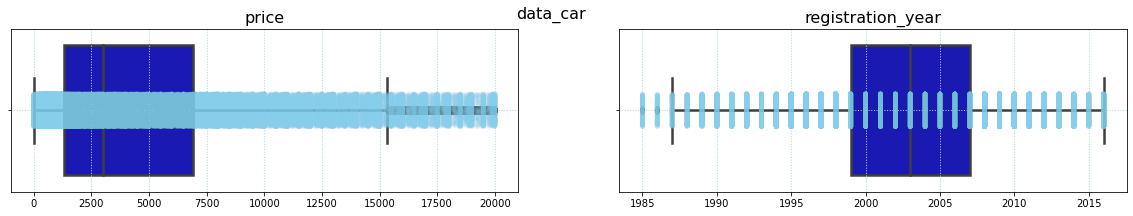

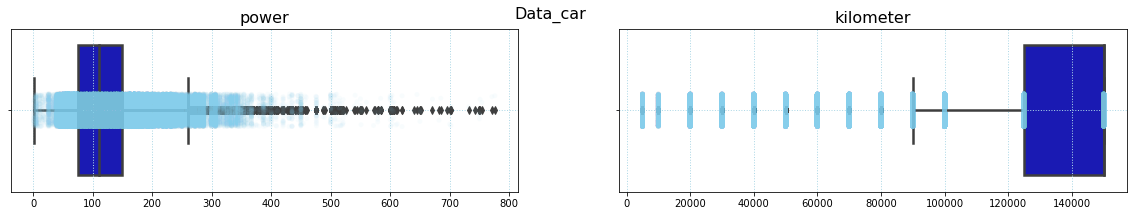

In [67]:
boxplot_5(df=data_car_clean[['price','registration_year']], 
          suptitle_='data_car', s=1, f=2, figsize_=(20, 3))
boxplot_5(df=data_car_clean[['power','kilometer']], 
          suptitle_='Data_car', s=1, f=2, figsize_=(20, 3))

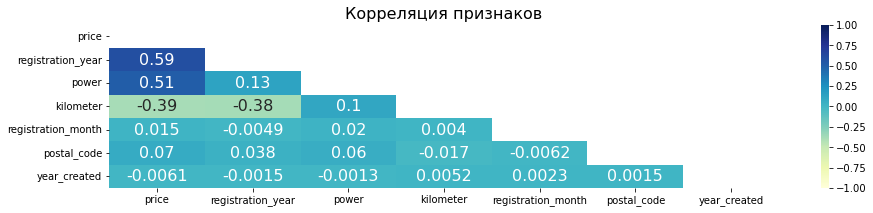

In [68]:
heatmap_b(data_car_clean)
plt.show()

Корреляция у цены с признаками года регистрации 0,56, мощности 0,5 и обратная с пробегом -0,35. После удаления и корректировок корреляция стала прослеживаться сильнее.

In [69]:
data_car_clean[
    ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
              ] = data_car_clean[
    ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
              ].astype('category')

In [70]:
data_car_clean.shape
print('Удалено объектов - ', data_car_before[0] - data_car_clean.shape[0])
print('Это составило ', round((((data_car_before[0] - data_car_clean.shape[0]) / 354369)*100), 1), '%')

Удалено объектов -  79992
Это составило  22.6 %


In [71]:
data_car_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274377 entries, 0 to 274376
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               274377 non-null  int64   
 1   vehicle_type        274377 non-null  category
 2   registration_year   274377 non-null  int64   
 3   gearbox             274377 non-null  category
 4   power               274377 non-null  int64   
 5   model               274377 non-null  category
 6   kilometer           274377 non-null  int64   
 7   registration_month  274377 non-null  int64   
 8   fuel_type           274377 non-null  category
 9   brand               274377 non-null  category
 10  not_repaired        274377 non-null  category
 11  postal_code         274377 non-null  int64   
 12  year_created        274377 non-null  int64   
dtypes: category(6), int64(7)
memory usage: 26.7 MB


**Вывод**
***

Размер измененного датасета составил - (274377, 13). Удалено 22% объектов с некорректными значениями и выбросами в данных.  
Обработаны пропущенные значения - частично заменены на моду по моделям авто, частично заменены на unknown - добавлена новая категоря модели, типа кузова, типа коробки передач и типа топлива.  
Удалены колонки с датами с информацией с сайта, а так же столбцец с количеством фото, так как в нем информация отсутствовала.

## Обучение моделей

### Подготовка признаков

Саначала разобьем выборку на тренировочную и тестовую, а так же, отдеим целевой признак от признаков.  
Целевой признак - количественная переменная.  
Фичи как количественные, так и категориальные.  


In [72]:
data_car_clean.head(2)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,postal_code,year_created
0,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes,66954,2016
1,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,90480,2016


In [73]:
target = data_car_clean['price']
feautures = data_car_clean.drop('price', axis=1)

In [74]:
print('Размер целевого признака', target.shape)
print('Размер фичей', feautures.shape)

Размер целевого признака (274377,)
Размер фичей (274377, 12)


Разделим на тестовую и обучающую выборки в отношнеии 25 % и 75 %.

In [75]:
features_train, features_valid, target_train, target_valid = train_test_split(
    feautures, target, test_size=.25, random_state=5)

In [76]:
# проверка размеров выборок
def sample_size(f_train, t_train, f_valid, t_valid):
    print('Размер тренировочной выборки признаков:', f_train.shape, 
          'целевого признака:', t_train.shape, sep='\n')
    print('Размер валидационной выборки признаков:', f_valid.shape, 
          'целевого признака:', t_valid.shape, sep='\n')

In [77]:
sample_size(features_train, target_train, features_valid, target_valid)

Размер тренировочной выборки признаков:
(205782, 12)
целевого признака:
(205782,)
Размер валидационной выборки признаков:
(68595, 12)
целевого признака:
(68595,)


Сначала обучим модели градиентного бустинга, для которых не требуется преобразование категориальных признаков в количественные.  
Затем применим технику OHE и стандартизируем признаки для обучения других моделей.

Построим несколько функций, которые понадобятся для обучения моделей и расчета метрики RMSE.

**rmse_result(model, X_valid, y_valid=target_valid)** - возвращает:

- pred_valid предсказания модели на валидационной выборке
- RMSE_valid RMSE на валидационной выборке

на вход:  
- model - модель
X_valid валидационная выборка признаков 
y_valid - целевой признак валидационной выборки

In [78]:
def rmse_result(model, X_valid, y_valid=target_valid):
    
    pred_valid = model.predict(X_valid)
    RMSE_valid = mean_squared_error(y_valid, pred_valid, squared=False)

    print('RMSE модели', RMSE_valid)
    
    return RMSE_valid, pred_valid 

**best_hyper_model(model, parameters_m, feautures, target)** - подбор лучших гиперпараметров с помощью GridSearchCV

возвращает:
- best_model модель с наилучшими гиперпараметрами
- best_params - подобранные гиперпараметры 

In [79]:
def best_hyper_model(model, parameters_m, feautures, target):
    
    # подбор лучших гиперпараметров модели с учетом метрики RMSE
    
    grid_m = GridSearchCV(model, parameters_m, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')
    grid_m.fit(feautures, target)

    best_params = grid_m.best_params_

    print('Гиперпараметры лучшей модели', best_params)
    
    # обучение модели с лучшими гиперпараметрами
    # функция возвращает модель, гиперпараметры
    
    best_model = model
    best_model.set_params(**best_params) # добавление лучших гиперпараметров

    return best_model, best_params

**cross_val(model, feautures, target)** - Оценка работы модели с помощью кросс-валидации и метрики RMSE   
Возвращает: 
- fit_time среднее время обучения
- score_time среднее время оценки
- result_score среднюю RMSE

In [80]:
def cross_val(model, feautures, target):
    
    cv_results = cross_validate(model, feautures, target, 
                                cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    
    fit_time = round(round(cv_results['fit_time'].mean()), 2) # округлить среднее время обучения 
    score_time = round((cv_results['score_time'].mean()), 3) # округлить среднее время оценки
    result_score = round((cv_results['test_score'].mean()*(-1)), 2) # округлить среднее время обучения
    
    print('Среднее время обучения', fit_time)
    print('Среднее время оценки', score_time)
    print('Средний результат RMSE', result_score)
    
    
    return fit_time, score_time, result_score   

**append_results(model_name1, RMSE_train_result, RMSE_valid_result, fit_time_m, score_time_m)** - добавляет в списки метрику RMSE на train и valid, среднее время обучения и оценки модели на тренировочных данных.  
Возвращает списки model_name, RMSE_train, RMSE_valid, fit_time_model, score_time_model.

In [81]:
model_name, RMSE_train, RMSE_valid, fit_time_model, score_time_model = [], [], [], [], []

In [82]:
def append_results(model_name1, RMSE_train_result, RMSE_valid_result, fit_time_m, score_time_m):
    
    model_name.append(model_name1)
       
    RMSE_train.append(RMSE_train_result) # результат RMSE на модели 
    RMSE_valid.append(RMSE_valid_result)
    fit_time_model.append(fit_time_m)
    score_time_model.append(score_time_m)
    
#     return model_name, RMSE_train, RMSE_valid, fit_time_model, score_time_model

In [83]:
# kde 

def predictions_kdeplot(prediction_model, target_real, 
                  suptitle_1='Вероятность распределения целевого признака - предсказанного и реального',
                 figsize_1=(20, 5), name_1="предсказание целевого признака", name_2="истиные значения целевого признака"):
    
    fig, ax = plt.subplots(figsize=figsize_1)

    fig.suptitle(suptitle_1, fontsize=16)

        
    kdeplot_t = sns.kdeplot(prediction_model, color='mediumblue', 
                        alpha=.4, shade=True, label=name_1) # kde для столбца первого датасета
        
    kdeplot_t = sns.kdeplot(target_real, color='lightgreen',
                        alpha=.4, shade=True, linewidth = 1, label=name_2) # kde для столбца второго датасета

    kdeplot_t.grid(color = 'lightblue', linewidth = 1, linestyle=':')
    kdeplot_t.set_xlabel('Цена - целевой признак', fontsize=16)
    kdeplot_t.legend(fontsize=15)
        
    return kdeplot_t

**Вывод**  
***

Датасет разделен на целевой признак - price и признаки.  
Выборка разделена на тренировочную и валидационную в размере 75% и 25% от исходного датасета.

Обучим модели:
- Градиентного бустинга CatBoostRegressor, LGBMRegressor, GradientBoostingRegressor
- Линейные модели LinearRegression, Lasso
- Случайный лес RandomForestRegressor

### Модели градиентного бустинга

#### CatBoost

In [84]:
cat_features = ['vehicle_type', 'gearbox', 'model', 
                'fuel_type', 'brand', 'not_repaired'] # категориальные признаки

Обучим модель со стандартными гиперпараметрами, посчитаем результат метрики RMSE.

In [85]:
cat = CatBoostRegressor(random_state=5, cat_features=cat_features)

In [86]:
%%time
cat.fit(features_train, target_train, verbose=False)

Wall time: 1min 35s


In [87]:
fit_time_cat1, score_time_cat1, rmse_cat1 = cross_val(cat, features_train, target_train)

Среднее время обучения 307
Среднее время оценки 0.247
Средний результат RMSE 1546.35


In [88]:
_, _, rmse_valid_cat1 = cross_val(cat, features_valid, target_valid)

Среднее время обучения 115
Среднее время оценки 0.069
Средний результат RMSE 1589.48


In [89]:
append_results('CatBoostRegressor()', rmse_cat1, rmse_valid_cat1, fit_time_cat1, score_time_cat1)

Напечатаем гиперпараметры модели по умолчанию и построим график важности признаков.

In [90]:
for key, value in cat.get_all_params().items():
    print(key, value)

nan_mode Min
eval_metric RMSE
combinations_ctr ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']
iterations 1000
sampling_frequency PerTree
fold_permutation_block 0
leaf_estimation_method Newton
counter_calc_method SkipTest
grow_policy SymmetricTree
penalties_coefficient 1
boosting_type Plain
model_shrink_mode Constant
feature_border_type GreedyLogSum
ctr_leaf_count_limit 18446744073709551615
bayesian_matrix_reg 0.10000000149011612
one_hot_max_size 2
force_unit_auto_pair_weights False
l2_leaf_reg 3
random_strength 1
rsm 1
boost_from_average True
max_ctr_complexity 4
model_size_reg 0.5
simple_ctr ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']
pool_metainfo_options {'tags': {}}
subsample 0.80000001192092

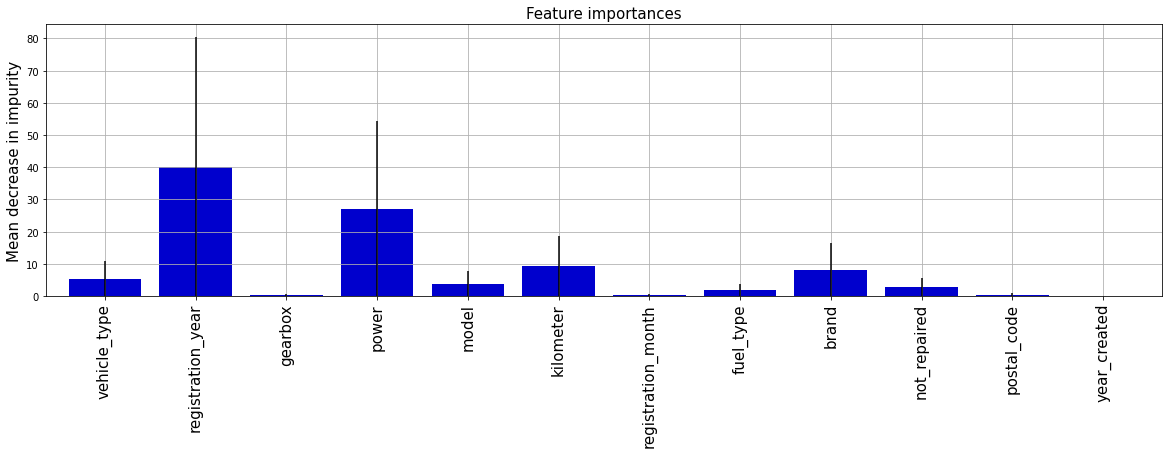

In [91]:
feature_importance = cat.get_feature_importance()

feature_importance = pd.Series(feature_importance, index=features_valid.columns)

fig, ax = plt.subplots(figsize=(20,5))

feature_importance.plot.bar(yerr=feature_importance, ax=ax, color='mediumblue', width=0.8)
ax.set_title("Feature importances", fontdict={'fontsize': 15})
ax.set_ylabel("Mean decrease in impurity", fontdict={'fontsize': 15})
plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [92]:
cat2 = CatBoostRegressor(random_state=5, cat_features=cat_features, depth=9, learning_rate=0.2,
                        ignored_features=['postal_code', 'year_created', 'registration_month', 'gearbox'],
                        l2_leaf_reg=3)

In [93]:
fit_time_cat2, score_time_cat2, rmse_cat2 = cross_val(cat2, features_train, target_train)

Среднее время обучения 499
Среднее время оценки 0.47
Средний результат RMSE 1515.56


In [94]:
%%time
cat2.fit(features_train, target_train, verbose=False)

Wall time: 2min 31s


In [95]:
rmse_cat_n, pred_cat2 = rmse_result(cat2, features_valid)

RMSE модели 1499.3029920480167


In [96]:
_, _, rmse_valid_cat2 = cross_val(cat2, features_valid, target_valid)

Среднее время обучения 206
Среднее время оценки 0.249
Средний результат RMSE 1585.35


In [97]:
append_results('CatBoostRegressor(**)', rmse_cat2, rmse_valid_cat2, fit_time_cat2, score_time_cat2)

**Вывод**  
***
Построена модель CatBoostRegressor. Расчет оценки RMSE производился с помощью кросс-валидации.  
RMSE для модели с гиперпараметрами по умолчанию на тренировочной выборке составила - 1546, на валидационной - 1590. Среднее время обучения - 307 s  

Для модели CatBoostRegressor были подобраны следующие гиперпараметры:
- random_state=5, 
- cat_features=cat_features, 
- depth=9, 
- learning_rate=0.2, 
- ignored_features='postal_code', 'year_created', 'registration_month', 'gearbox',
- l2_leaf_reg=3.  

С помощью гипермараметров метрика RMSE улучшилась и составила:
- тренировочной выборке составила - 1515, 
- на валидационной - 1585.  
Среднее время обучения - 508, оценки - 0.9.

Время обучения модели с гиперпараметрами - 2 min 40 s

Наиболее значимые признаки для модели:
1. Год регистрации
2. Мощность
3. Пробег
4. Бренд
5. Тип кузова

#### LGBMRegressor

In [98]:
lgb_booster = lgb.LGBMRegressor(n_jobs=-1, random_state=5)

In [99]:
%%time
lgb_booster.fit(features_train, target_train, categorical_feature=['vehicle_type', 'gearbox', 'model', 
                                                                   'fuel_type', 'brand', 'not_repaired'])

C:\Users\Olli\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Wall time: 1.17 s


LGBMRegressor(random_state=5)

In [100]:
# RMSE с кросс-валидацией на тренировочной выборке
fit_time_LGB1, score_time_LGB1, rmse_LGB1 = cross_val(lgb.LGBMRegressor(n_jobs=-1, random_state=5, 
                                categorical_feature=['vehicle_type', 'gearbox', 'model', 
                                                     'fuel_type', 'brand', 'not_repaired']), 
                                                      features_train, target_train)

Среднее время обучения 2
Среднее время оценки 0.522
Средний результат RMSE 1562.46


In [101]:
# RMSE без кросс-валидации на валидационной выборке
rmse_lgb, pred_lgb = rmse_result(lgb_booster, features_valid)

RMSE модели 1559.9837937552895


In [102]:
# RMSE с кросс-валидацией на валидационной выборке
_, _, rmse_valid_LGB1 = cross_val(lgb_booster, features_valid, target_valid)

Среднее время обучения 1
Среднее время оценки 0.166
Средний результат RMSE 1601.84


In [103]:
append_results('LGBMRegressor', rmse_LGB1, rmse_valid_LGB1, fit_time_LGB1, score_time_LGB1)

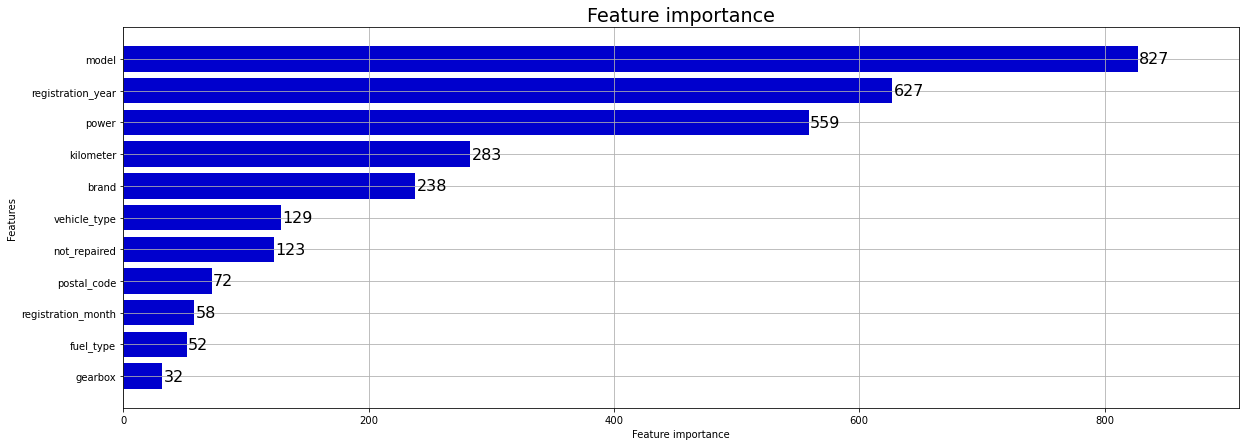

In [104]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.rcParams['font.size'] = '16'
lgb.plot_importance(lgb_booster, ax=ax, height=0.8, xlim=None, 
                         ylim=None, title='Feature importance', xlabel='Feature importance', 
                         ylabel='Features', importance_type='auto', max_num_features=None, ignore_zero=True, 
                         dpi=100, grid=True, color='mediumblue')
plt.show()

In [105]:
params_lgb = {'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [36],
    'learning_rate': [0.3],
    'n_estimators': [100, 120],
    'subsample_for_bin': [100000, 200000]
}

In [106]:
# подбор гиперпараметров
lgb2, best_params_lgb2 = best_hyper_model(lgb.LGBMRegressor(n_jobs=-1, random_state=5, 
                                categorical_feature=['vehicle_type', 'gearbox', 'model', 
                                                     'fuel_type', 'brand', 'not_repaired']),
                                          params_lgb, features_train, target_train)

C:\Users\Olli\anaconda3\lib\site-packages\lightgbm\basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
C:\Users\Olli\anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


Гиперпараметры лучшей модели {'boosting_type': 'dart', 'learning_rate': 0.3, 'n_estimators': 120, 'num_leaves': 36, 'subsample_for_bin': 200000}


In [107]:
%%time
lgb2.fit(features_train, target_train)

Wall time: 3.46 s


LGBMRegressor(boosting_type='dart',
              categorical_feature=['vehicle_type', 'gearbox', 'model',
                                   'fuel_type', 'brand', 'not_repaired'],
              learning_rate=0.3, n_estimators=120, num_leaves=36,
              random_state=5)

In [108]:
fit_time_LGB2, score_time_LGB2, rmse_LGB2 = cross_val(lgb2, features_train, target_train)

Среднее время обучения 10
Среднее время оценки 0.706
Средний результат RMSE 1527.11


In [109]:
_, _, rmse_valid_LGB2 = cross_val(lgb2, features_valid, target_valid)

Среднее время обучения 3
Среднее время оценки 0.21
Средний результат RMSE 1571.66


In [110]:
append_results('LGBMRegressor(**)', rmse_LGB2, rmse_valid_LGB2, fit_time_LGB2, score_time_LGB2)

**Вывод**  
***
Построена модель LGBMRegressor. С помощью кросс-валидации проверена точность предсказаний метрикой RMSE: 

- RMSE для модели с гиперпараметрами по умолчанию на тренировочной выборке составила - 1563, на валидационной - 1602. Время обучения - 2, оценки 0,6.  
- RMSE для модели с подобранными гиперпараметрами с помощью кросс-валидации LGBMRegressor на тренировочной выборке составила -1526, на валидационной - 1570. Время обучения - 3 s.

Гиперпараметры модели:  
- boosting_type='dart',    
- categorical_feature=['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired'],  
- learning_rate=0.3,   
- n_estimators=120,   
- num_leaves=36,  
- random_state=5.

Наиболее важные признаки для модели LGBMRegressor - модель, год регистрации, мощность, пробег, бренд.  
Отличие LGBMRegressor от CatBoostRegressor в признаке модель, у LGBMRegressor большая зависимость от модели, чем от типа кузова.

### Подготовка категориальных признаков для других моделей

#### OHE и стандартизация признаков 

Для линейных моделей линейной регрессии и Лассо закодируем признаки техникой OHE.

In [111]:
feautures_ohe = pd.get_dummies(data=feautures, drop_first=True)

print(feautures_ohe.shape)

(274377, 308)


In [112]:
feautures_ohe_train = feautures_ohe.loc[features_train.index, :]
feautures_ohe_valid = feautures_ohe.loc[features_valid.index, :]
feautures_ohe_valid.index

Int64Index([261289, 248675,  98056,  23197, 273446, 123379,  82158,  46714,
            191125, 225137,
            ...
            211166, 245670,  41800, 230064,  12546, 235207,  15842,  17307,
            129082, 157525],
           dtype='int64', length=68595)

In [113]:
sample_size(feautures_ohe_train, target_train, feautures_ohe_valid, target_valid)

Размер тренировочной выборки признаков:
(205782, 308)
целевого признака:
(205782,)
Размер валидационной выборки признаков:
(68595, 308)
целевого признака:
(68595,)


In [114]:
# проверка размера выборок 
print('Размер тренировочной выборки признаков:', feautures_ohe_train.shape, 
          'целевого признака:', target_train.shape, sep='\n')
print('Размер валидационной выборки признаков:', feautures_ohe_valid.shape, 
          'целевого признака:', target_valid.shape, sep='\n')

Размер тренировочной выборки признаков:
(205782, 308)
целевого признака:
(205782,)
Размер валидационной выборки признаков:
(68595, 308)
целевого признака:
(68595,)


In [115]:
feautures_ohe_train.describe().T

,count,mean,std,min,25%,50%,75%,max
registration_year,205782.0,2003.116866,5.759897,1985.0,1999.0,2003.0,2007.0,2016.0
power,205782.0,120.569438,53.990355,1.0,75.0,110.0,150.0,776.0
kilometer,205782.0,128742.795774,36420.377305,5000.0,125000.0,150000.0,150000.0,150000.0
registration_month,205782.0,6.358156,3.336201,1.0,3.0,6.0,9.0,12.0
postal_code,205782.0,51403.968481,25807.606551,1067.0,30982.0,50354.0,72270.0,99998.0
...,...,...,...,...,...,...,...,...
brand_trabant,205782.0,0.000612,0.024737,0.0,0.0,0.0,0.0,1.0
brand_volkswagen,205782.0,0.214999,0.410823,0.0,0.0,0.0,0.0,1.0
brand_volvo,205782.0,0.009437,0.096686,0.0,0.0,0.0,0.0,1.0
not_repaired_unknown,205782.0,0.148691,0.355785,0.0,0.0,0.0,0.0,1.0


Признаки необходимо стандартизировать.

In [116]:
std_columns = ['registration_year', 'power', 'kilometer', 'registration_month', 'postal_code', 'year_created']

In [117]:
def kde_one(df, title_1, ncols_1=1, figsize_1=(20, 5), step=20, fontsize_1=14, loc1='upper right'):

    fig, (ax1) = plt.subplots(ncols=ncols_1, figsize=figsize_1)
    
    ax1.set_title(title_1, fontsize=16)
    
    cmap = plt.get_cmap('GnBu')
    
    b_colors = cmap(np.array([i for i in range(50, 500, step)]))

    for i in range(len(df.columns)):
        
        sns.kdeplot(df.iloc[:, i], ax = ax1, shade=True, legend=True, color=b_colors[i], label=df.columns[i])
        
    plt.grid(color = 'lightblue', linewidth = 1, linestyle=':')
    plt.legend(fontsize=fontsize_1, loc=loc1)
    plt.show() 

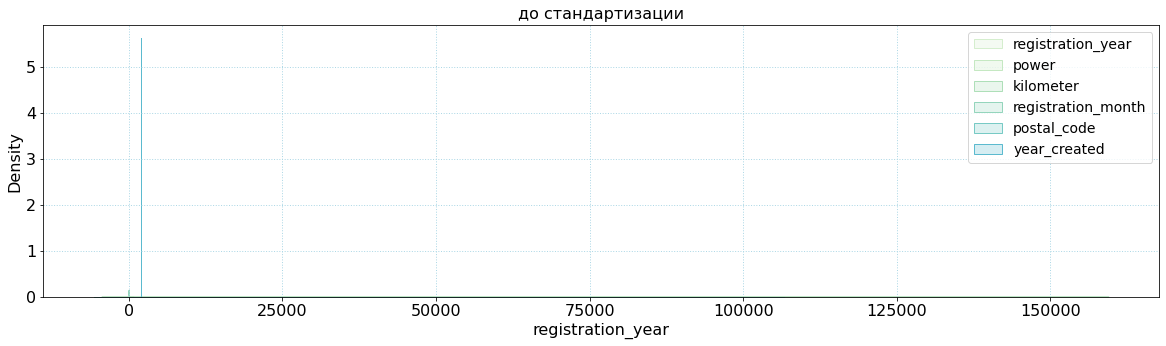

In [118]:
kde_one(feautures_ohe_train[std_columns], title_1='до стандартизации')

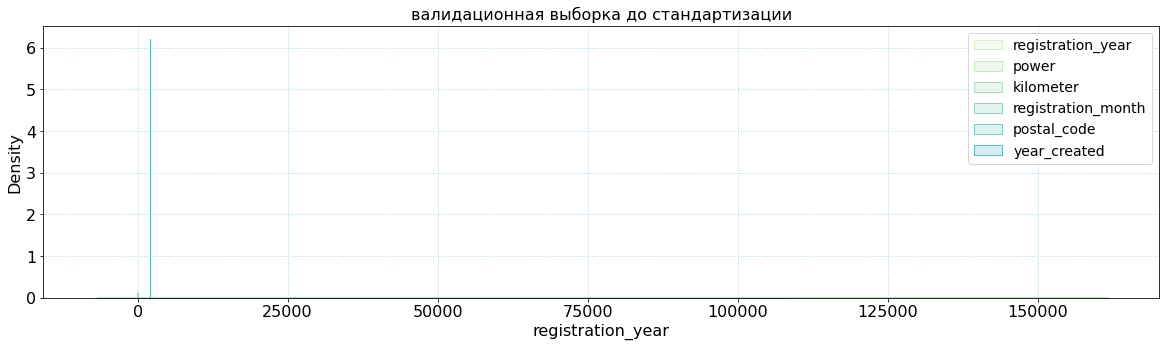

In [119]:
kde_one(feautures_ohe_valid[std_columns], title_1='валидационная выборка до стандартизации')

In [120]:
pd.options.mode.chained_assignment = None

# обучение на тренировочных
scaler_car = StandardScaler()
scaler_car.fit(feautures_ohe_train[std_columns])

# стандартизация выбранных столбцов
feautures_ohe_train[std_columns] = scaler_car.transform(feautures_ohe_train[std_columns])
feautures_ohe_valid[std_columns] = scaler_car.transform(feautures_ohe_valid[std_columns])

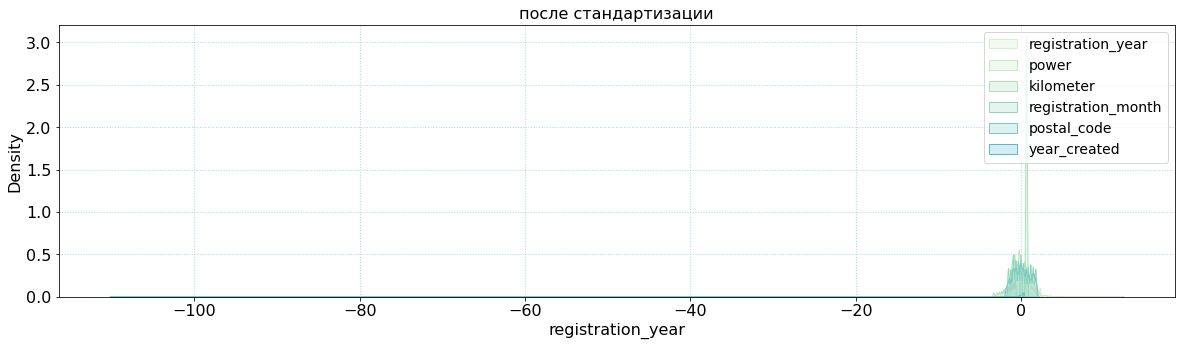

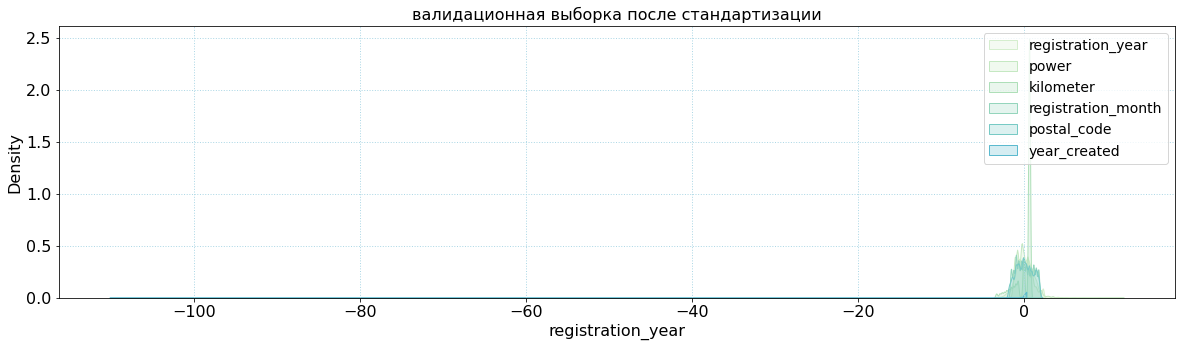

In [121]:
kde_one(feautures_ohe_train[std_columns], title_1='после стандартизации')
kde_one(feautures_ohe_valid[std_columns], title_1='валидационная выборка после стандартизации')

In [122]:
feautures_ohe_train.describe().T

,count,mean,std,min,25%,50%,75%,max
registration_year,205782.0,-1.106373e-14,1.000002,-3.145353,-0.714748,-0.020290,0.674169,2.236700
power,205782.0,3.083952e-16,1.000002,-2.214650,-0.844031,-0.195766,0.545109,12.139801
kilometer,205782.0,1.453422e-15,1.000002,-3.397634,-0.102767,0.583664,0.583664,0.583664
registration_month,205782.0,-7.082256e-17,1.000002,-1.606069,-1.006583,-0.107355,0.791874,1.691103
postal_code,205782.0,-4.400601e-17,1.000002,-1.950475,-0.791318,-0.040685,0.808525,1.882939
...,...,...,...,...,...,...,...,...
brand_trabant,205782.0,6.122985e-04,0.024737,0.000000,0.000000,0.000000,0.000000,1.000000
brand_volkswagen,205782.0,2.149994e-01,0.410823,0.000000,0.000000,0.000000,0.000000,1.000000
brand_volvo,205782.0,9.437171e-03,0.096686,0.000000,0.000000,0.000000,0.000000,1.000000
not_repaired_unknown,205782.0,1.486913e-01,0.355785,0.000000,0.000000,0.000000,0.000000,1.000000


In [123]:
feautures_ohe_valid.describe().T

,count,mean,std,min,25%,50%,75%,max
registration_year,68595.0,0.001720,1.000083,-3.145353,-0.714748,-0.020290,0.674169,2.236700
power,68595.0,0.005019,0.998202,-2.214650,-0.806988,-0.177244,0.545109,11.676754
kilometer,68595.0,0.005423,0.996932,-3.397634,-0.102767,0.583664,0.583664,0.583664
registration_month,68595.0,-0.001428,0.999543,-1.606069,-1.006583,-0.107355,0.791874,1.691103
postal_code,68595.0,0.006191,0.995978,-1.950475,-0.783064,-0.025844,0.811954,1.882939
...,...,...,...,...,...,...,...,...
brand_trabant,68595.0,0.000729,0.026989,0.000000,0.000000,0.000000,0.000000,1.000000
brand_volkswagen,68595.0,0.219039,0.413598,0.000000,0.000000,0.000000,0.000000,1.000000
brand_volvo,68595.0,0.009141,0.095169,0.000000,0.000000,0.000000,0.000000,1.000000
not_repaired_unknown,68595.0,0.145288,0.352393,0.000000,0.000000,0.000000,0.000000,1.000000


#### OriginalEncoder и стандартизация для моделей GradientBoostingRegressor и RandomForest

Для моделей GradientBoostingRegressor и случайного леса применим original encoder только для категориальных признаков.

In [124]:
feautures.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,postal_code,year_created
0,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes,66954,2016
1,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,90480,2016
2,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,91074,2016
3,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,60437,2016
4,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,33775,2016


In [125]:
cat_features

['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

In [126]:
encoder = OrdinalEncoder()
encoder.fit(feautures[cat_features])

OrdinalEncoder()

In [127]:
feautures_original = feautures.copy()
feautures_original[cat_features] = pd.DataFrame(encoder.transform(feautures[cat_features]), columns=feautures[cat_features].columns)
feautures_original.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,postal_code,year_created
0,2.0,2011,1.0,190,225.0,125000,5,2.0,1.0,2.0,66954,2016
1,6.0,2004,0.0,163,117.0,125000,8,2.0,14.0,1.0,90480,2016
2,5.0,2001,1.0,75,116.0,150000,6,6.0,38.0,0.0,91074,2016
3,5.0,2008,1.0,69,101.0,90000,7,2.0,31.0,0.0,60437,2016
4,4.0,1995,1.0,102,11.0,150000,10,6.0,2.0,2.0,33775,2016


Разделим признаки на тест и трейн по тем же индексам, что было получено ранее.

In [128]:
feautures_original_train = feautures_original.loc[features_train.index, :]
feautures_original_valid = feautures_original.loc[features_valid.index, :]
feautures_original_valid.index

Int64Index([261289, 248675,  98056,  23197, 273446, 123379,  82158,  46714,
            191125, 225137,
            ...
            211166, 245670,  41800, 230064,  12546, 235207,  15842,  17307,
            129082, 157525],
           dtype='int64', length=68595)

In [129]:
sample_size(feautures_original_train, target_train, feautures_original_valid, target_valid)

Размер тренировочной выборки признаков:
(205782, 12)
целевого признака:
(205782,)
Размер валидационной выборки признаков:
(68595, 12)
целевого признака:
(68595,)


In [130]:
feautures_original_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205782 entries, 9851 to 18638
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   vehicle_type        205782 non-null  float64
 1   registration_year   205782 non-null  int64  
 2   gearbox             205782 non-null  float64
 3   power               205782 non-null  int64  
 4   model               205782 non-null  float64
 5   kilometer           205782 non-null  int64  
 6   registration_month  205782 non-null  int64  
 7   fuel_type           205782 non-null  float64
 8   brand               205782 non-null  float64
 9   not_repaired        205782 non-null  float64
 10  postal_code         205782 non-null  int64  
 11  year_created        205782 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 28.5 MB


In [131]:
feautures_original_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68595 entries, 261289 to 157525
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vehicle_type        68595 non-null  float64
 1   registration_year   68595 non-null  int64  
 2   gearbox             68595 non-null  float64
 3   power               68595 non-null  int64  
 4   model               68595 non-null  float64
 5   kilometer           68595 non-null  int64  
 6   registration_month  68595 non-null  int64  
 7   fuel_type           68595 non-null  float64
 8   brand               68595 non-null  float64
 9   not_repaired        68595 non-null  float64
 10  postal_code         68595 non-null  int64  
 11  year_created        68595 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 8.8 MB


**Стандартизация признаков закодированных OriginalEncoder**

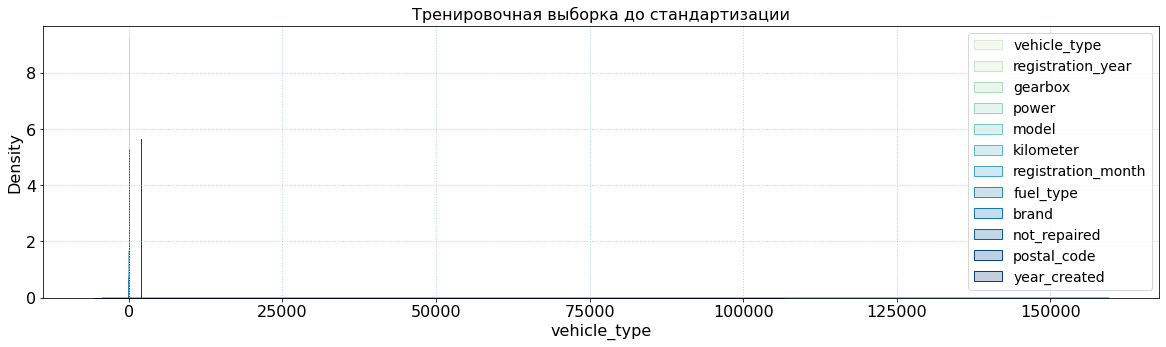

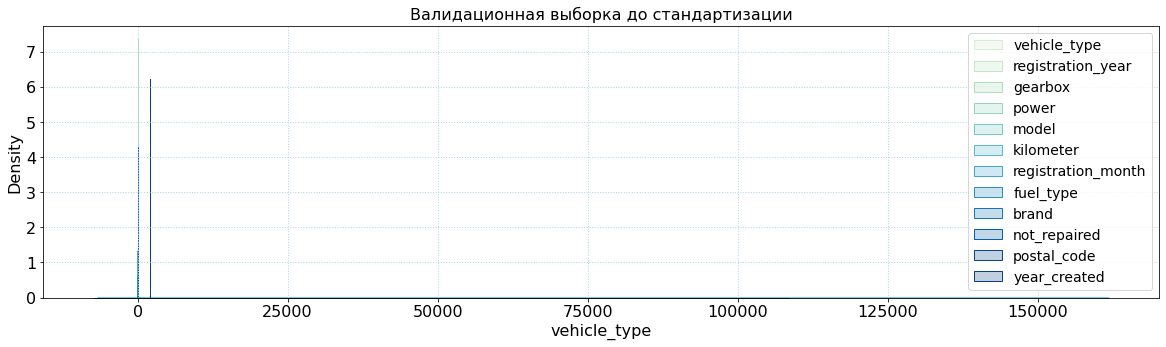

In [132]:
kde_one(feautures_original_train, title_1='Тренировочная выборка до стандартизации')
kde_one(feautures_original_valid, title_1='Валидационная выборка до стандартизации')

In [133]:
pd.options.mode.chained_assignment = None

# обучение на тренировочных
scaler_car_2 = StandardScaler()
scaler_car_2.fit(feautures_original_train)

# стандартизация выбранных столбцов
feautures_original_train[feautures_original_train.columns] = scaler_car_2.transform(feautures_original_train)
feautures_original_valid[feautures_original_valid.columns] = scaler_car_2.transform(feautures_original_valid)

feautures_original_valid.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,postal_code,year_created
261289,0.345833,0.153325,0.500217,-1.121859,0.886655,-0.102767,-0.407097,0.685371,-0.872837,-0.533992,1.525214,0.009089
248675,-0.130208,0.674169,0.500217,0.785893,-1.390070,0.583664,0.192388,-1.478826,-1.396554,-0.533992,1.480654,0.009089
98056,0.345833,0.500554,0.500217,-1.121859,-0.396590,0.583664,1.091617,0.685371,0.249412,-0.533992,1.376149,0.009089
23197,-0.130208,0.326940,0.500217,0.285803,-0.741548,0.583664,0.192388,-1.478826,-1.172104,0.994708,-0.070056,0.009089
273446,-0.130208,-0.888363,0.500217,0.915547,0.583092,0.583664,-0.407097,0.685371,-0.798021,-0.533992,-0.611835,0.009089


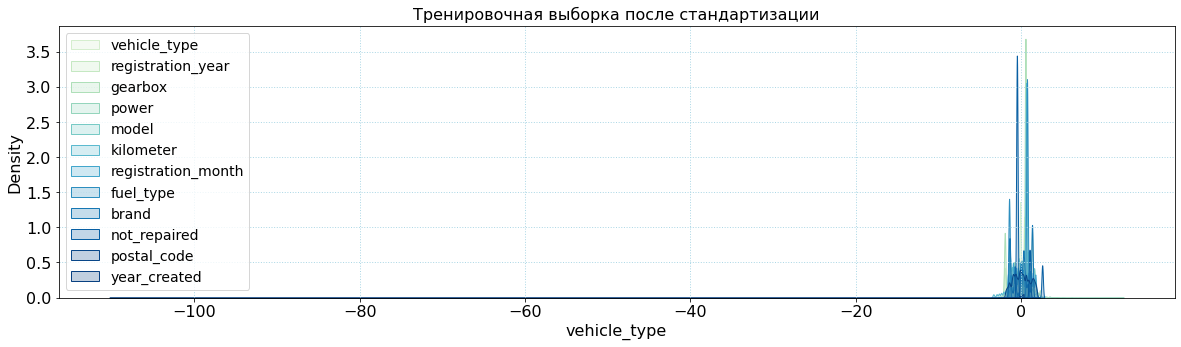

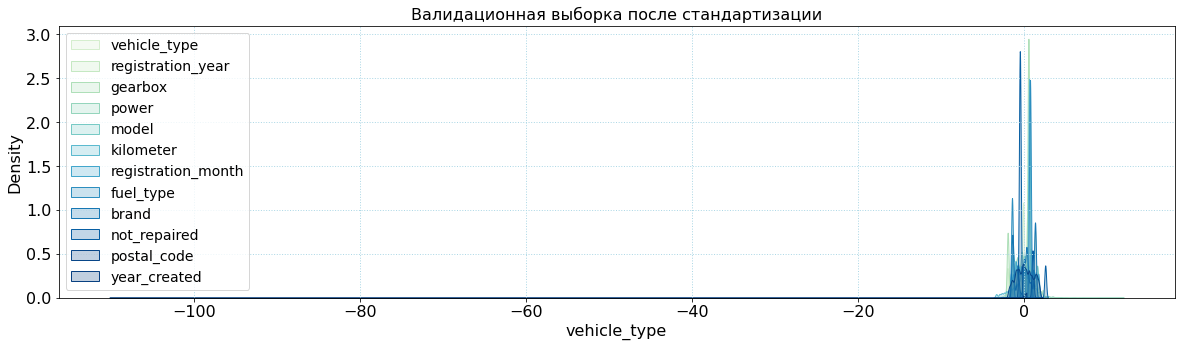

In [134]:
kde_one(feautures_original_train, title_1='Тренировочная выборка после стандартизации', loc1='upper left')
kde_one(feautures_original_valid, title_1='Валидационная выборка после стандартизации', loc1='upper left')

In [135]:
feautures_original_train.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_type,205782.0,-2.820904e-17,1.000002,-2.034370,-0.130208,-0.130208,0.345833,1.297914
registration_year,205782.0,-1.106373e-14,1.000002,-3.145353,-0.714748,-0.020290,0.674169,2.236700
gearbox,205782.0,-5.471709e-16,1.000002,-1.999132,0.500217,0.500217,0.500217,0.500217
power,205782.0,3.083952e-16,1.000002,-2.214650,-0.844031,-0.195766,0.545109,12.139801
model,205782.0,3.855784e-16,1.000002,-1.541852,-0.962322,0.058755,0.803865,1.866337
kilometer,205782.0,1.453422e-15,1.000002,-3.397634,-0.102767,0.583664,0.583664,0.583664
registration_month,205782.0,-7.082256e-17,1.000002,-1.606069,-1.006583,-0.107355,0.791874,1.691103
fuel_type,205782.0,-2.079354e-15,1.000002,-2.560925,-1.478826,0.685371,0.685371,0.685371
brand,205782.0,-2.235298e-16,1.000002,-1.546187,-0.872837,0.174595,0.922762,1.371661
not_repaired,205782.0,7.063578e-16,1.000002,-0.533992,-0.533992,-0.533992,-0.533992,2.523408


In [136]:
feautures_original_valid.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_type,68595.0,0.003017,1.001173,-2.034370,-0.130208,-0.130208,0.345833,1.297914
registration_year,68595.0,0.001720,1.000083,-3.145353,-0.714748,-0.020290,0.674169,2.236700
gearbox,68595.0,-0.000673,1.000511,-1.999132,0.500217,0.500217,0.500217,0.500217
power,68595.0,0.005019,0.998202,-2.214650,-0.806988,-0.177244,0.545109,11.676754
model,68595.0,0.000488,0.999678,-1.541852,-0.962322,0.058755,0.803865,1.866337
kilometer,68595.0,0.005423,0.996932,-3.397634,-0.102767,0.583664,0.583664,0.583664
registration_month,68595.0,-0.001428,0.999543,-1.606069,-1.006583,-0.107355,0.791874,1.691103
fuel_type,68595.0,-0.005330,1.002816,-2.560925,-1.478826,0.685371,0.685371,0.685371
brand,68595.0,0.004021,1.003523,-1.546187,-0.872837,0.249412,0.997578,1.371661
not_repaired,68595.0,-0.009427,0.994548,-0.533992,-0.533992,-0.533992,-0.533992,2.523408


**Вывод**  
***

Проведена стандартизация  признаков - 'registration_year', 'power', 'kilometer', 'registration_month', 'postal_code', 'year_created'.  
Применен OHE для категориальных признаков, для моделей:  
- Линейной регрессии 
- Лассо

Для обучения моделей, GradientBoostingRegressor, RandomForestRegressor применена кодировка OriginalEncoder. Все признаки стандартизированы.  

### GradientBoostingRegressor

In [137]:
sklrn_GBR = GradientBoostingRegressor(random_state=5)

In [138]:
%%time
sklrn_GBR.fit(feautures_original_train, target_train)

Wall time: 18.2 s


GradientBoostingRegressor(random_state=5)

In [139]:
fit_time_GBR, score_time_GBR, rmse_train_GBR = cross_val(sklrn_GBR, feautures_original_train, target_train)

Среднее время обучения 28
Среднее время оценки 0.069
Средний результат RMSE 1847.71


In [140]:
_, _, rmse_valid_GBR = cross_val(sklrn_GBR, feautures_original_valid, target_valid)

Среднее время обучения 7
Среднее время оценки 0.016
Средний результат RMSE 1852.26


In [141]:
append_results('GradientBoostingRegressor', rmse_train_GBR, rmse_valid_GBR, fit_time_GBR, score_time_GBR)

In [142]:
parameters_grid_GBR = {'min_samples_leaf': [2],
                      'max_depth': [3, 7],
                      'alpha': [0.1, 0.9]}

Подберем гиперпараметры.

In [143]:
sklrn_GBR2, param_GBR2 = best_hyper_model(sklrn_GBR, parameters_grid_GBR, feautures_original_train, target_train)

Гиперпараметры лучшей модели {'alpha': 0.1, 'max_depth': 7, 'min_samples_leaf': 2}


Проверим работу модели с измененными гиперпараметрами

In [144]:
%%time
sklrn_GBR2.fit(feautures_original_train, target_train)

Wall time: 42.2 s


GradientBoostingRegressor(alpha=0.1, max_depth=7, min_samples_leaf=2,
                          random_state=5)

In [145]:
fit_time_GBR2, score_time_GBR2, rmse_train_GBR2 = cross_val(sklrn_GBR2, feautures_original_train, target_train)

Среднее время обучения 69
Среднее время оценки 0.187
Средний результат RMSE 1590.77


In [146]:
_, _, rmse_valid_GBR2 = cross_val(sklrn_GBR2, feautures_original_valid, target_valid)

Среднее время обучения 16
Среднее время оценки 0.062
Средний результат RMSE 1632.2


In [147]:
rmse_gbr2, pred_gbr2 = rmse_result(sklrn_GBR2, feautures_original_valid)

RMSE модели 1586.6734393758734


In [148]:
append_results('GradientBoostingRegressor(**)', rmse_train_GBR2, rmse_valid_GBR2, fit_time_GBR2, score_time_GBR2)

**Вывод**  
***
Модель GradientBoostingRegressor оказалась наихудшей по предсказанию моделью среди испробованных моделей градиентного бустинга.  
Метрика RMSE на тренировочных данных составила - 1848, на валидационных - 1853. Время обучения 18 s.  
Гиперпараметры {random_state=5, min_samples_leaf=2, max_depth=7, alpha=0.1} улучшили работу модели и RMSE на кросс-валидации составила:    
- для тренировочных данных - 1589, среднее время обучения на кросс-валидации 68.  
- для валидационной выборки - 1626. 

Время обучения модели с гиперпараметрами 44 s  

### Случайный лес

In [149]:
forest = RandomForestRegressor(random_state=5, n_jobs=-1)

In [150]:
%%time
forest.fit(feautures_original_train, target_train)

Wall time: 20.7 s


RandomForestRegressor(n_jobs=-1, random_state=5)

In [151]:
fit_time_forest, score_time_forest, rmse_train_forest = cross_val(forest, feautures_original_train, target_train)

Среднее время обучения 88
Среднее время оценки 3.169
Средний результат RMSE 1580.87


In [152]:
_, _, rmse_valid_forest = cross_val(forest, feautures_original_valid, target_valid)

Среднее время обучения 23
Среднее время оценки 0.606
Средний результат RMSE 1693.05


In [153]:
append_results('RandomForestRegressor()', rmse_train_forest, rmse_valid_forest, fit_time_forest, score_time_forest)

In [154]:
parameters_forest  = {'min_samples_split': [2, 5],
                      'n_estimators': [100, 110]}

In [155]:
forest2, param_forest2 = best_hyper_model(forest, parameters_forest, feautures_original_train, target_train)
forest2

Гиперпараметры лучшей модели {'min_samples_split': 5, 'n_estimators': 110}


RandomForestRegressor(min_samples_split=5, n_estimators=110, n_jobs=-1,
                      random_state=5)

In [156]:
%%time
forest2.fit(feautures_original_train, target_train)

Wall time: 22.3 s


RandomForestRegressor(min_samples_split=5, n_estimators=110, n_jobs=-1,
                      random_state=5)

In [157]:
fit_time_forest2, score_time_forest2, rmse_train_forest2 = cross_val(forest2, feautures_original_train, target_train)

Среднее время обучения 85
Среднее время оценки 1.14
Средний результат RMSE 1577.41


In [158]:
_, _, rmse_valid_forest2 = cross_val(forest2, feautures_original_valid, target_valid)

Среднее время обучения 21
Среднее время оценки 1.33
Средний результат RMSE 1690.27


In [159]:
append_results('RandomForestRegressor(**)', rmse_train_forest2, rmse_valid_forest2, fit_time_forest2, score_time_forest2)

**Вывод**
****
Модель с гиперпараметрами по умолчанию показывает точность на тренировочных данных RMSE 1582, но на валидационной выборке RMSE  выше - 1692. Время обучения составило 19.4s

Подбор гиперпараметров не сильно улучшил работу модели: RMSE на тренировочной выборке составила - 1578, на валидационной - 1688.
Гиперпараметры модели: RandomForestRegressor(min_samples_split=5, n_estimators=110, n_jobs=-1, random_state=5), обучается 25.6s  
СРеднее время обучения в кросс-валидации - 100, оценки - 1.3.

### Линейная регрессия

In [160]:
parameters_lreg ={'fit_intercept':[True, False], 
             'copy_X':[True, False], 
             'normalize': [True, False]}

In [161]:
model_linear_reg = LinearRegression()

In [162]:
%%time
model_linear_reg.fit(feautures_ohe_train, target_train)

Wall time: 4.05 s


LinearRegression()

In [163]:
fit_time_lreg, score_time_lreg, rmse_train_lreg = cross_val(model_linear_reg, feautures_ohe_train, target_train)

Среднее время обучения 12
Среднее время оценки 0.144
Средний результат RMSE 2446.02


In [164]:
_, _, rmse_valid_lreg = cross_val(model_linear_reg, feautures_ohe_valid, target_valid)

Среднее время обучения 4
Среднее время оценки 0.041
Средний результат RMSE 2456.19


In [165]:
append_results('LinearRegression()', rmse_train_lreg, rmse_valid_lreg, fit_time_lreg, score_time_lreg)

Подберем гиперпараметры

In [166]:
best_model_llg, best_params_llg = best_hyper_model(LinearRegression(), parameters_lreg, feautures_ohe_train, target_train)

Гиперпараметры лучшей модели {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [167]:
%%time
best_model_llg.fit(feautures_ohe_train, target_train)

Wall time: 4.09 s


LinearRegression(normalize=True)

**Вывод** 
***
На тренировочных данных метрика RMSE модели линейной регрессии составила 2446, на валидационной - 2456. Модель обучалась 3.5s.    
Лучшими гиперпараметрами модели оказались гиперпараметры по умолчанию.

### Лассо

In [168]:
parameters_Lasso  = {'alpha': np.arange(.1, 1)}

In [169]:
model_lasso = linear_model.Lasso(alpha=0.1)

In [170]:
%%time
model_lasso.fit(feautures_ohe_train, target_train)

Wall time: 36.2 s


Lasso(alpha=0.1)

In [171]:
fit_time_lasso, score_time_lasso, rmse_train_lasso = cross_val(model_lasso, feautures_ohe_train, target_train)

Среднее время обучения 258
Среднее время оценки 0.1
Средний результат RMSE 2446.93


In [172]:
_, _, rmse_valid_lasso = cross_val(model_lasso, feautures_ohe_valid, target_valid)

Среднее время обучения 32
Среднее время оценки 0.028
Средний результат RMSE 2456.54


In [173]:
append_results('Lasso()', rmse_train_lasso, rmse_valid_lasso, fit_time_lasso, score_time_lasso)

In [174]:
model_lasso2, best_params_lasso = best_hyper_model(
    linear_model.Lasso(), parameters_Lasso, feautures_ohe_train, target_train)

Гиперпараметры лучшей модели {'alpha': 0.1}


In [175]:
%%time
model_lasso2.fit(feautures_ohe_train, target_train)

Wall time: 28 s


Lasso(alpha=0.1)

**Вывод**
***  

Лчшими гиперпараметрами для модели Лассо так же, как и для линенйой регрессии оказались параметры по умолчанию.  
Точность предсказания RMSE составила:  
- на тренировочной выборке - 2446  
- на валидационной - 2456  
Среднее время обучения при кросс-валидации - 237, оценки - 0.97.   
Время обучения модели - 31 s.

## Анализ моделей

### Сравнение моделей

Для анализа моделей:
- построим датафрем со значениями метрики RMSE как на тренировочных, так и на тестовых данных, а так же, для моделей с настроенными гиперпараметрами и сравним результаты  
- замерим скорость работы предсказания настроенных моделей    
- построим графики распределения целевого признака - предсказанного моделями и истиного  


In [176]:
result = pd.DataFrame({'RMSE_train': RMSE_train, 'RMSE_valid': RMSE_valid, 
                       'fit_time': fit_time_model,  'score_time': score_time_model}, 
                      index=model_name)

result = result.round(1)
result

,RMSE_train,RMSE_valid,fit_time,score_time
CatBoostRegressor(),1546.4,1589.5,307,0.2
CatBoostRegressor(**),1515.6,1585.4,499,0.5
LGBMRegressor,1562.5,1601.8,2,0.5
LGBMRegressor(**),1527.1,1571.7,10,0.7
GradientBoostingRegressor,1847.7,1852.3,28,0.1
GradientBoostingRegressor(**),1590.8,1632.2,69,0.2
RandomForestRegressor(),1580.9,1693.0,88,3.2
RandomForestRegressor(**),1577.4,1690.3,85,1.1
LinearRegression(),2446.0,2456.2,12,0.1
Lasso(),2446.9,2456.5,258,0.1


Модели с подобранными гиперпараметрами обозначены (**)

Измерим время работы предсказания моделей.  

In [177]:
%%time
pred_cat2 = cat2.predict(features_valid)

Wall time: 562 ms


In [178]:
%%time
pred_valid_lgb2 = lgb2.predict(features_valid)

Wall time: 247 ms


In [179]:
%%time
pred_valid_GBR2 = sklrn_GBR2.predict(feautures_original_valid)

Wall time: 343 ms


In [180]:
%%time
pred_valid_forest2 = forest2.predict(feautures_original_valid)

Wall time: 1.03 s


In [181]:
%%time
pred_valid_lreg2 = model_linear_reg.predict(feautures_ohe_valid)

Wall time: 88.8 ms


In [182]:
%%time
pred_valid_lasso2 = model_lasso.predict(feautures_ohe_valid)

Wall time: 86.4 ms


И рассмотрим графики распределения предсказанных значений и истинного целевого признака.

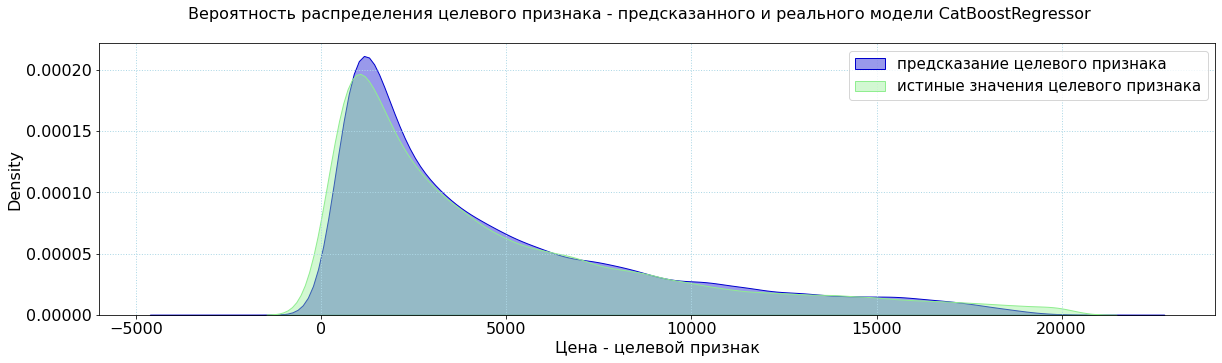

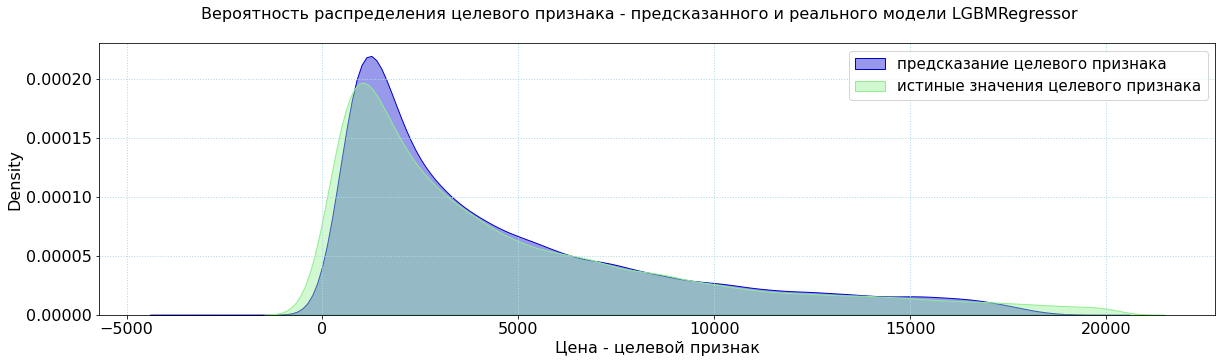

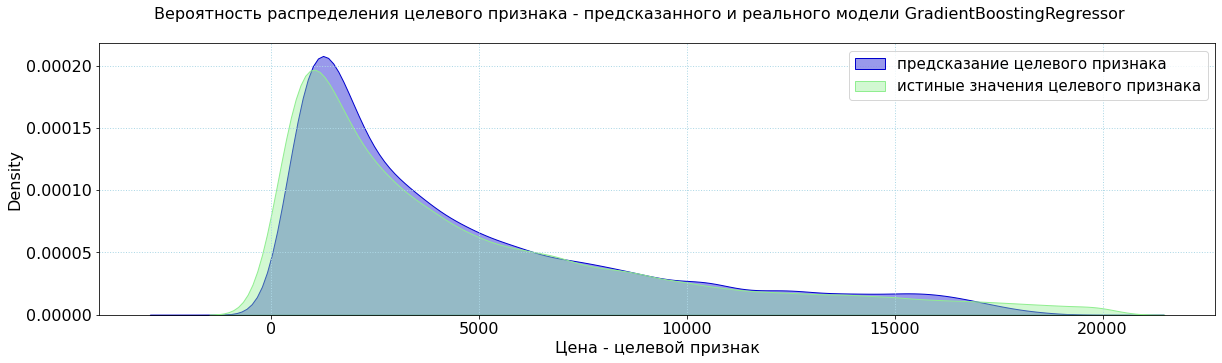

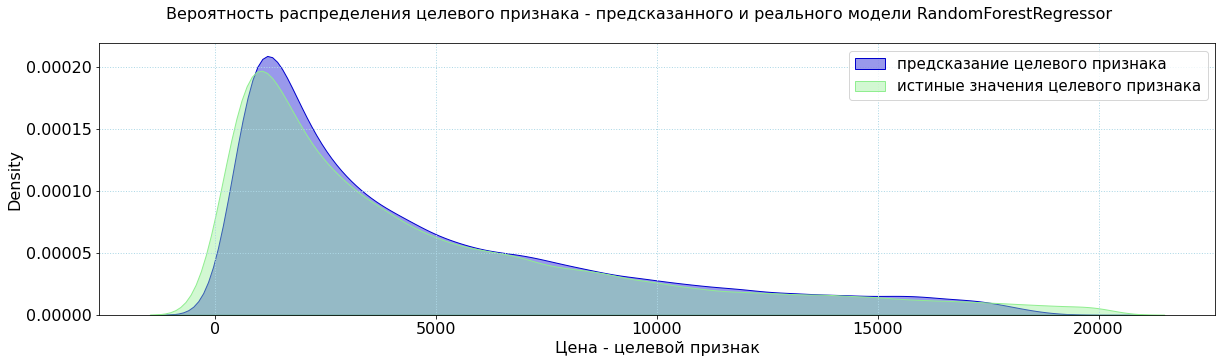

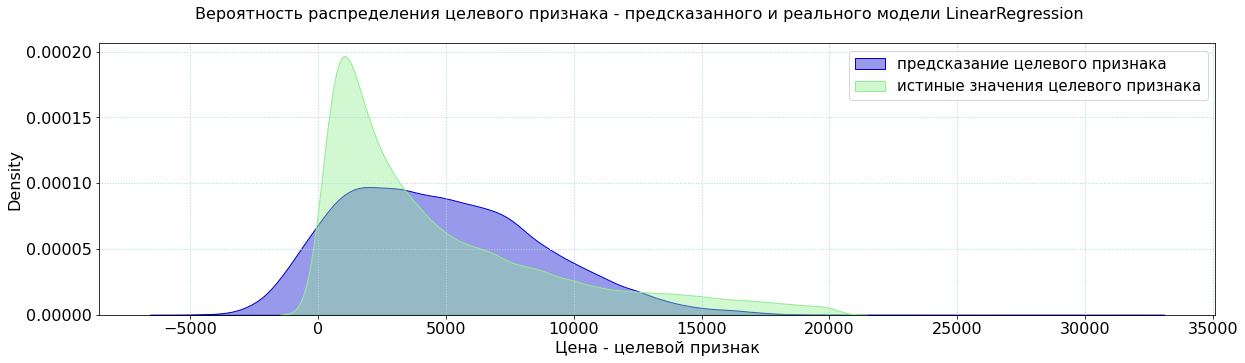

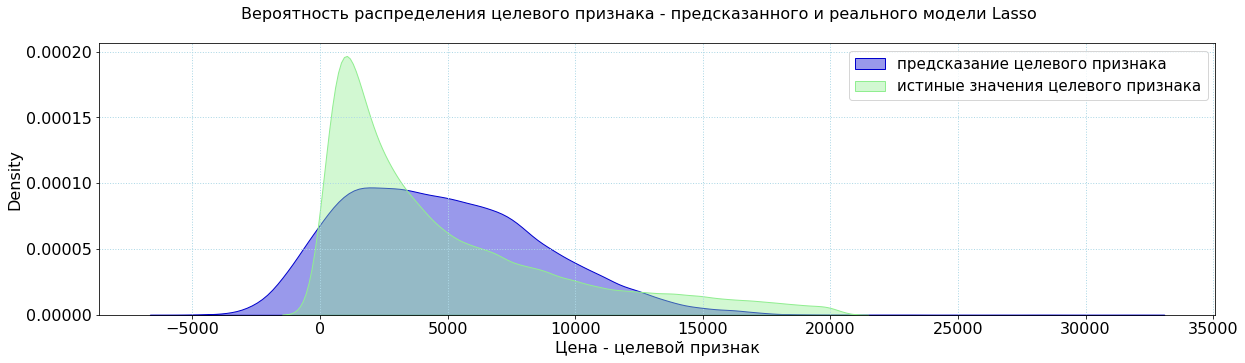

In [183]:
predictions = [pred_cat2, pred_valid_lgb2, pred_valid_GBR2, pred_valid_forest2, pred_valid_lreg2, pred_valid_lasso2]
names = ['CatBoostRegressor', 'LGBMRegressor', 'GradientBoostingRegressor', 
         'RandomForestRegressor', 'LinearRegression', 'Lasso']

for i in range(len(names)):
    predictions_kdeplot(predictions[i], target_valid, 
                    suptitle_1=(
                        'Вероятность распределения целевого признака - предсказанного и реального модели ' + names[i]))
plt.show()

Линейные модели плохо предсказывают значения, находящиеся на пике распределения. В целом, распределение предсказанных значений для модели Лассо и линейной регрессии сильно отличается от истиных значений признака. При этом, в разы ниже время предсказания моделей - для линейных моделей от 90 до 100 ms.   

Все модели градиентного бустинга достаточно близко предсказывают значение цены, при этом, пик распределения, немного смещен относительно истиных значений. Явно видны отличия в предсказаниях на хвостах распределения - модели значительно хуже предсказывает значения целевого признака, которые слишком малы или слишком велики, то есть близки к границам распределения признака.  

Время предскзания из моделей градиентного бустинга: 
- CatBoostRegressor - 538 ms.
- LGBMRegressor - 246 ms.  

Чуть выше метрика RMSE у модели LGBMRegressor, на валидационной выборке она составила 1570, а у CatBoostRegressor - 1585.

Линейные модели показали худший результат точности предсказаний с метрикой RMSE 2456 на валидационной выборке, оцененной кросс-валидацией и для моели линейной регрессии и для модели Лассо.

Модель случайного леса с гиперпараметрами (random_state=5, n_jobs=-1, min_samples_split=5, n_estimators=130) показала RMSE на валидационной выборке - RMSE=1688, время предсказания модели - 1.24s, это самое высокое время предсказания среди рассмотренных моделей. 

**Вывод**
***  

Лучшие по скорости выполнения предсказаний - это линейные модели Лассо и линейной регрессии - около 100ms, при этом, точность предсказаний значительно хуже, по сравнению с моделями градиентного бустинга RMSE - 2456.  

Самое низкое время предсказания среди моделей градиентного бустинга у модели RandomForestRegressor - 1.3s.

Модели градиентного бустинга показали наилучшую точность среди рассмотренных моделей: самая высокая точность предсказания у модели LGBMRegressor c гиперпараметрами:
- boosting_type='dart', 
- categorical_feature=['vehicle_type', 'gearbox', 'model','fuel_type', 'brand', 'not_repaired'],
- learning_rate=0.3, 
- n_estimators=120, 
- num_leaves=36, 
- random_state=5.  

RMSE модели на валидационной выборке при оценке с помощью кросс-валидации составила 1570.  
Чуть хуже RMSE у модели CatBoostRegressor - 1585, при этом, и время обучения, оценки и предсказания у модели CatBoostRegressor выше, чем у модели LGBMRegressor.  

Для обеих моделей нет необходимости проводить дополнительную работу с категориальными признаками, которых в датасете более 50%.   
Рекомендуется модель LGBMRegressor.

### Проверка модели на адекватность

In [184]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(feautures_original_train, target_train)

DummyRegressor()

In [185]:
pred_dummy= dummy_regr.predict(feautures_original_valid)
RMSE_dummy = mean_squared_error(target_valid, pred_dummy) ** 0.5

print('RMSE Дамми модели', RMSE_dummy)

RMSE Дамми модели 4597.624321777961


**Вывод**
***
Все модели более точные, чем Дамми модель. RMSE Дамми модели 4597.

## Вывод

Целью исследования было получить наиболее быструю и точную модель, которая будет рекомендовать пользователям цену на их автомобиль.  
 
Исходный датасет содержал информацию о самих продаваемых машинах, а так же, некоторую информацию об активности пользователя на сайте.  

В сырых данных присутсоввали:
- пропуски
- дубликаты
- некорректные значения и выбросы

Были удалены из датасета следущие признаки  'date_crawled', 'date_created', 'last_seen', 'number_of_pictures', которые описывали поведение пользователя на сайте. Так же, в столбце number_of_pictures инфомрмация отсутствовала.  
Год создания анкеты сохранился в новом столбце.

Целевой признак - price - количественный, признаки в датасете как количественные, так и категориальные.  

Было обучено две модели градиентного бустинга, для которых предварительная обработка категориальных признаков не понадобилась: 
- CatBoostRegressor
- LGBMRegressor  

и еще одна:  
- GradientBoostingRegressor

Так же, были обучены две линейные модели:
- LinearRegression
- Lasso  

И модель случайного леса.   

Для обучения линейных моделей была применена кодировка категориальных признаков OHE и стандартизация признаков, так как средние значения признаков имели разный масштаб.   
Линейные модели показали самую высокую скорость предсказания, но при этом самую низкую точность предсказаний - метрика RMSE составила 2456 на валидационной выборке.  

С помощью OriginalEncoder были закодирован категориальные признаки для обучения моделей RandomForestRegressor и GradientBoostingRegressor.  
С помощью подбора гиперпараметров для модели RandomForestRegressor RMSE улучшилась незначительно и составила при оценке с помощью кросс-валидации на тренировочной выборке 1578, на валидационной - 1688. Точность предсказания модели хуже, чем моделей градиентного бустинга. Так же, у модели самое высокое время предсказания - 1.3 s. 

В целом, модели CatBoostRegressor и LGBMRegressor показали наилучшую точность предсказания среди всех представленных моделей:  чуть выше точность модели LGBMRegressor.

- **LGBMRegressor RMSE  - 1570**,   

гиперпараметры LGBMRegressor(boosting_type='dart', categorical_feature=['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired'], learning_rate=0.3, n_estimators=120, num_leaves=36, random_state=5).  

- **RMSE CatBoostRegressor - 1585**,     

гиперпараметры модели CatBoostRegressor(random_state=5, cat_features=cat_features, depth=9, learning_rate=0.2, ignored_features=['postal_code', 'year_created', 'registration_month', 'gearbox'], l2_leaf_reg=3)

Так же, для моделей  LGBMRegressor и CatBoostRegressor не требуется предварительная работа с категориальными признаками, что значительно сокращает предобработку данных, так как в исходном датасете категориальных признаков более 50%.

С учетом точности предсказания, времени обучения и предсказания рекомендуется модель LGBMRegressor(boosting_type='dart', categorical_feature=['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired'], learning_rate=0.3, n_estimators=120, num_leaves=36, random_state=5).   

На точность предсказания модели сильнее влияет предварительная подготовка признаков, чем настройка гиперпараметров. Поэтому, необходимо обратить особое внимание на исходные данные, в которых встречаются нереальные данные.  
Тем не менее, с помощью настройки гиперпараметров удалось достичь более высокой точности предсказаний для моделей градиентного бустинга.  

Проверку на адекватность прошли все модели, RMSE Дамми модели составило 4567, RMSE каждой рассмотренной модели ниже.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка  и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей